# 括苍山

# 数值模拟路径和实际路径的对比

(241, 301)
(241, 301)
(241, 301)


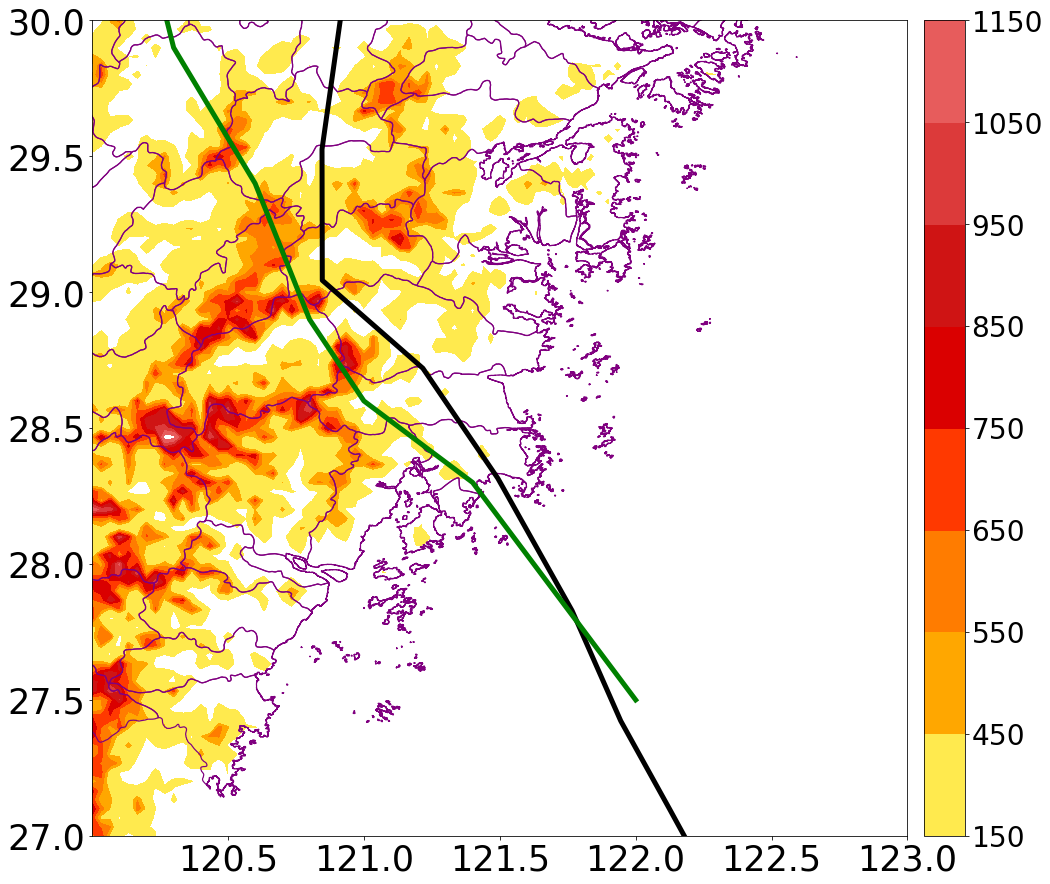

In [1]:
# 局地地形的
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import netCDF4 

from ncmaps import Cmaps

from matplotlib import cm
from ncmaps import Cmaps
from cartopy.feature import ShapelyFeature
from cartopy.io.shapereader import Reader
import pandas as pd
self_define_list = [130,144,155,170,185,200,225,235,240,244]
rgb_file = 'ncl_default'
#以下是核心api,实质为调用Cmaps基类的listmap()方法
cmaps = Cmaps('ncl_default',self_define_list).listmap()

#geo = netCDF4.Dataset('/home/liyuan3970/Data/data/meto_data/geogphy_file/taiz.nc')
geo = netCDF4.Dataset('/home/liyuan3970/Data/data/meto_data/geogphy_file/eastchina.nc')
x =geo.variables['lon']
y = geo.variables['lat']
z=  geo.variables['Band1']


f = netCDF4.Dataset('/home/liyuan3970/Data/data/meto_data/radar_typhoon_liqima/wenzhou_rada/out/Z_RADR_I_Z9577_20190809162900_O_DOR_SA_CAP.bin.bz2.nc')
name ="Z_RADR_I_Z9577_20190809162900_O_DOR_SA_CAP.bin.bz2.nc"
u =f.variables['u'][0,0,:,:]
v = f.variables['v'][0,0,:,:]
ref =  f.variables['ref'][0,1,:,:]
lat = f.variables['lat']
lon = f.variables['lon']




box = [118, 123.5, 26, 30]
scale = '10m'
xstep, ystep = 0.5, 0.5
fig = plt.figure(figsize=(20, 15))

from mpl_toolkits.basemap import Basemap
m = Basemap(llcrnrlon=120.0,llcrnrlat=27.0,urcrnrlon=123.0,urcrnrlat=30.0)


fname = '/home/liyuan3970/Data/data/meto_data/geogphy_file/zhejiang.shp'
fname = '/home/liyuan3970/Data/data/meto_data/geogphy_file/zhejiang'


# zero_direction_label用来设置经度的0度加不加E和W
lon_formatter = LongitudeFormatter(zero_direction_label=False)
lat_formatter = LatitudeFormatter()
#ax.quiver(lon[::3],lat[::3],u[::3,::3], v[::3,::3], transform=ccrs.PlateCarree())

#levels = [100,150,200,250,300,350,400,450,500,550,600,650,700,750,800]
levels = [150,450,550,650,750,850,950,1050,1150]
lons, lats = np.meshgrid(lon[::5], lat[::5])



lons2, lats2 = np.meshgrid(x[::4], y[::4])
print(lons2.shape)
print(lats2.shape)
print(z[::4,::4].shape)
shade = m.contourf(lons2,lats2,z[::4,::4],cmap=cmaps,levels=levels)
#m.barbs(lons,lats,u[::5,::5]*2.5, v[::5,::5]*2.5)
m.readshapefile(fname,'zhejiang',color='purple',linewidth=1.2)
plt.rcParams['font.size'] = 28
m.colorbar(shade)


csv_data_path = "/home/liyuan3970/Typhoon_LMQ/src/station_info/"
data_station = pd.read_csv(csv_data_path+'温台暴雨点.CSV')

#print(data)

# lat_station = list(data_station.iloc[:,0])
# lon_station = list(data_station.iloc[:,1])
name_station = list(data_station.iloc[:,2])

lat_station = [26.0425,26.9354,27.0979,27.4228,27.8284,28.315,28.7202,29.0438,29.5259,30.1772,30.7437,31.3097,31.7144]
lon_station = [122.564,122.214,122.125,121.945,121.766,121.493,121.217,120.847,120.846,120.938,120.937,120.746,120.84]

x, y = m(lon_station, lat_station)
m.plot(lon_station, lat_station,color="black",linewidth=5)


lat_real = [27.5,27.9,28.3,28.6,28.9,29.4,29.9,30.3]
lon_real = [122.0,121.7,121.4,121.0,120.8,120.6,120.3,120.2]
m.plot(lon_real, lat_real,color="green",linewidth=5)
# i = 0
# for a,b in zip(x,y):
    
#     plt.text(a,b, name_station[i], fontsize=12)
#     i = i+1
    


# x1, y1 = m(121.32, 28.39)
# plt.plot(x1, y1, 'ok', markersize=5)
# plt.text(x1, y1, ' 58664', fontsize=12)

x_val_list=[120.5,121,121.5,122,122.5,123]
#x_text_list=['80E','100E','120E','140E','160E']
plt.xticks(x_val_list,fontsize=35)
y_val_list=[27,27.5,28,28.5,29,29.5,30]
# y_text_list=['10S','0','10N','20N','30N','40N','50N']
plt.yticks(y_val_list,fontsize=35)
# 添加网格线
#ax.grid()
#plt.title(name[15:28],fontsize=35,fontweight='bold') 
plt.savefig('/home/liyuan3970/3DVAR_retrive_radar_wind_from_typhoon1909/picture/'+'route-liqima.png')
#plt.savefig('../图片包/括苍山图/'+'台风路径对比')
plt.show()


## 台风路径修改

In [ ]:
x, y = m(121.0, 29.2)
plt.plot(x, y, 'ok', marker="*",markersize=30,c="blue")
#plt.text(x, y, ' 58568', fontsize=12)

(241, 301)
(241, 301)
(241, 301)


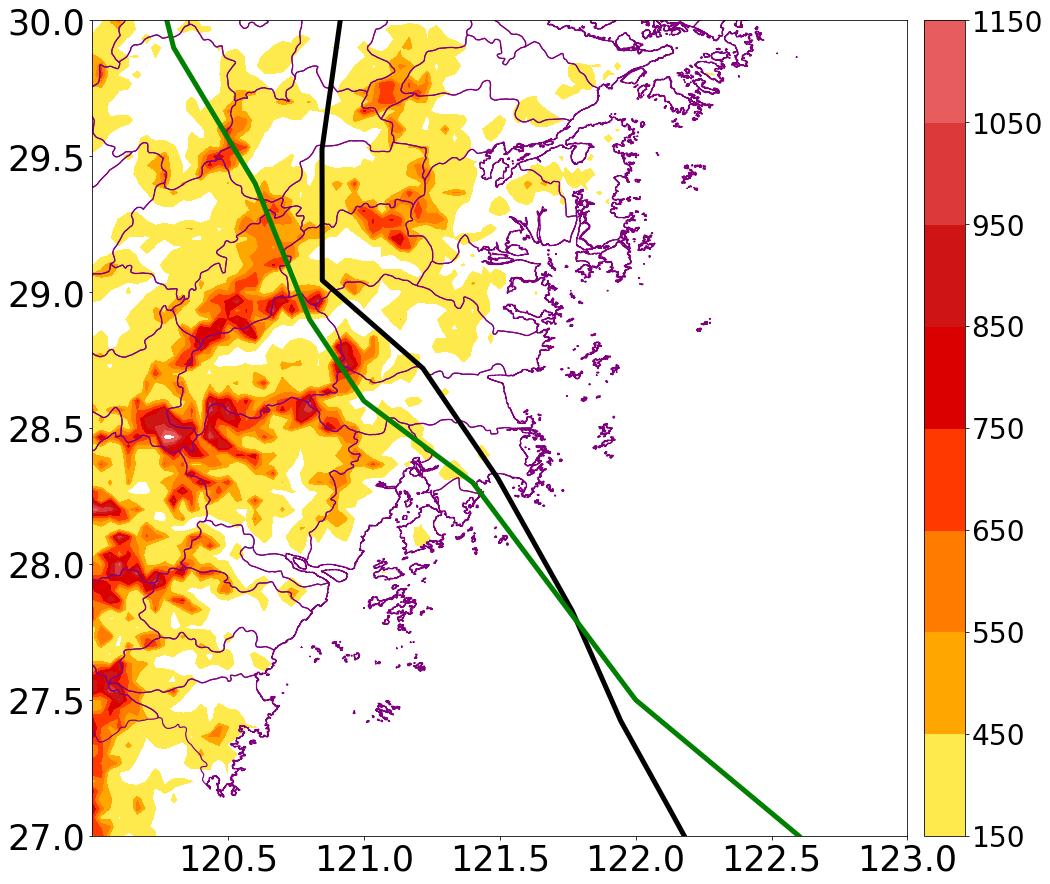

In [1]:
# 局地地形的
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import netCDF4 

from ncmaps import Cmaps

from matplotlib import cm
from ncmaps import Cmaps
from cartopy.feature import ShapelyFeature
from cartopy.io.shapereader import Reader
import pandas as pd
self_define_list = [130,144,155,170,185,200,225,235,240,244]
rgb_file = 'ncl_default'
#以下是核心api,实质为调用Cmaps基类的listmap()方法
cmaps = Cmaps('ncl_default',self_define_list).listmap()

#geo = netCDF4.Dataset('/home/liyuan3970/Data/data/meto_data/geogphy_file/taiz.nc')
geo = netCDF4.Dataset('/home/liyuan3970/Data/data/meto_data/geogphy_file/eastchina.nc')
x =geo.variables['lon']
y = geo.variables['lat']
z=  geo.variables['Band1']


f = netCDF4.Dataset('/home/liyuan3970/Data/data/meto_data/radar_typhoon_liqima/wenzhou_rada/out/Z_RADR_I_Z9577_20190809162900_O_DOR_SA_CAP.bin.bz2.nc')
name ="Z_RADR_I_Z9577_20190809162900_O_DOR_SA_CAP.bin.bz2.nc"
u =f.variables['u'][0,0,:,:]
v = f.variables['v'][0,0,:,:]
ref =  f.variables['ref'][0,1,:,:]
lat = f.variables['lat']
lon = f.variables['lon']




box = [118, 123.5, 26, 30]
scale = '10m'
xstep, ystep = 0.5, 0.5
fig = plt.figure(figsize=(20, 15))

from mpl_toolkits.basemap import Basemap
m = Basemap(llcrnrlon=120.0,llcrnrlat=27.0,urcrnrlon=123.0,urcrnrlat=30.0)


fname = '/home/liyuan3970/Data/data/meto_data/geogphy_file/zhejiang.shp'
fname = '/home/liyuan3970/Data/data/meto_data/geogphy_file/zhejiang'


# zero_direction_label用来设置经度的0度加不加E和W
lon_formatter = LongitudeFormatter(zero_direction_label=False)
lat_formatter = LatitudeFormatter()
#ax.quiver(lon[::3],lat[::3],u[::3,::3], v[::3,::3], transform=ccrs.PlateCarree())

#levels = [100,150,200,250,300,350,400,450,500,550,600,650,700,750,800]
levels = [150,450,550,650,750,850,950,1050,1150]
lons, lats = np.meshgrid(lon[::5], lat[::5])



lons2, lats2 = np.meshgrid(x[::4], y[::4])
print(lons2.shape)
print(lats2.shape)
print(z[::4,::4].shape)
shade = m.contourf(lons2,lats2,z[::4,::4],cmap=cmaps,levels=levels)
#m.barbs(lons,lats,u[::5,::5]*2.5, v[::5,::5]*2.5)
m.readshapefile(fname,'zhejiang',color='purple',linewidth=1.2)
plt.rcParams['font.size'] = 28
m.colorbar(shade)


csv_data_path = "/home/liyuan3970/Typhoon_LMQ/src/station_info/"
data_station = pd.read_csv(csv_data_path+'温台暴雨点.CSV')

#print(data)

# lat_station = list(data_station.iloc[:,0])
# lon_station = list(data_station.iloc[:,1])
name_station = list(data_station.iloc[:,2])

lat_station = [26.0425,26.9354,27.0979,27.4228,27.8284,28.315,28.7202,29.0438,29.5259,30.1772,30.7437,31.3097,31.7144]
lon_station = [122.564,122.214,122.125,121.945,121.766,121.493,121.217,120.847,120.846,120.938,120.937,120.746,120.84]

x, y = m(lon_station, lat_station)
m.plot(lon_station, lat_station,color="black",linewidth=5)


lat_real = [27.0,27.5,27.9,28.3,28.6,28.9,29.4,29.9,30.3]
lon_real = [122.6,122.0,121.7,121.4,121.0,120.8,120.6,120.3,120.2]
m.plot(lon_real, lat_real,color="green",linewidth=5)

##########实际登陆时间
# x, y = m(122.0, 27.5)
# plt.plot(x, y, 'ok', marker=".",markersize=10,c="green")
# plt.text(x, y, '0809_19:00', fontsize=25,c="green")


# x, y = m(121.4, 28.3)
# plt.plot(x, y, 'ok', marker=".",markersize=10,c="green")
# plt.text(x, y, '0810_01:45', fontsize=25,c="green",horizontalalignment='left', verticalalignment='bottom')









# i = 0
# for a,b in zip(x,y):
    
#     plt.text(a,b, name_station[i], fontsize=12)
#     i = i+1
    


# x1, y1 = m(121.32, 28.39)
# plt.plot(x1, y1, 'ok', markersize=5)
# plt.text(x1, y1, ' 58664', fontsize=12)

x_val_list=[120.5,121,121.5,122,122.5,123]
#x_text_list=['80E','100E','120E','140E','160E']
plt.xticks(x_val_list,fontsize=35)
y_val_list=[27,27.5,28,28.5,29,29.5,30]
# y_text_list=['10S','0','10N','20N','30N','40N','50N']
plt.yticks(y_val_list,fontsize=35)
# 添加网格线
#ax.grid()
#plt.title(name[15:28],fontsize=35,fontweight='bold') 
plt.savefig('/home/liyuan3970/3DVAR_retrive_radar_wind_from_typhoon1909/picture/'+'route-liqima.png')
#plt.savefig('../图片包/括苍山图/'+'台风路径对比')
plt.show()


## 读取台风模式数据

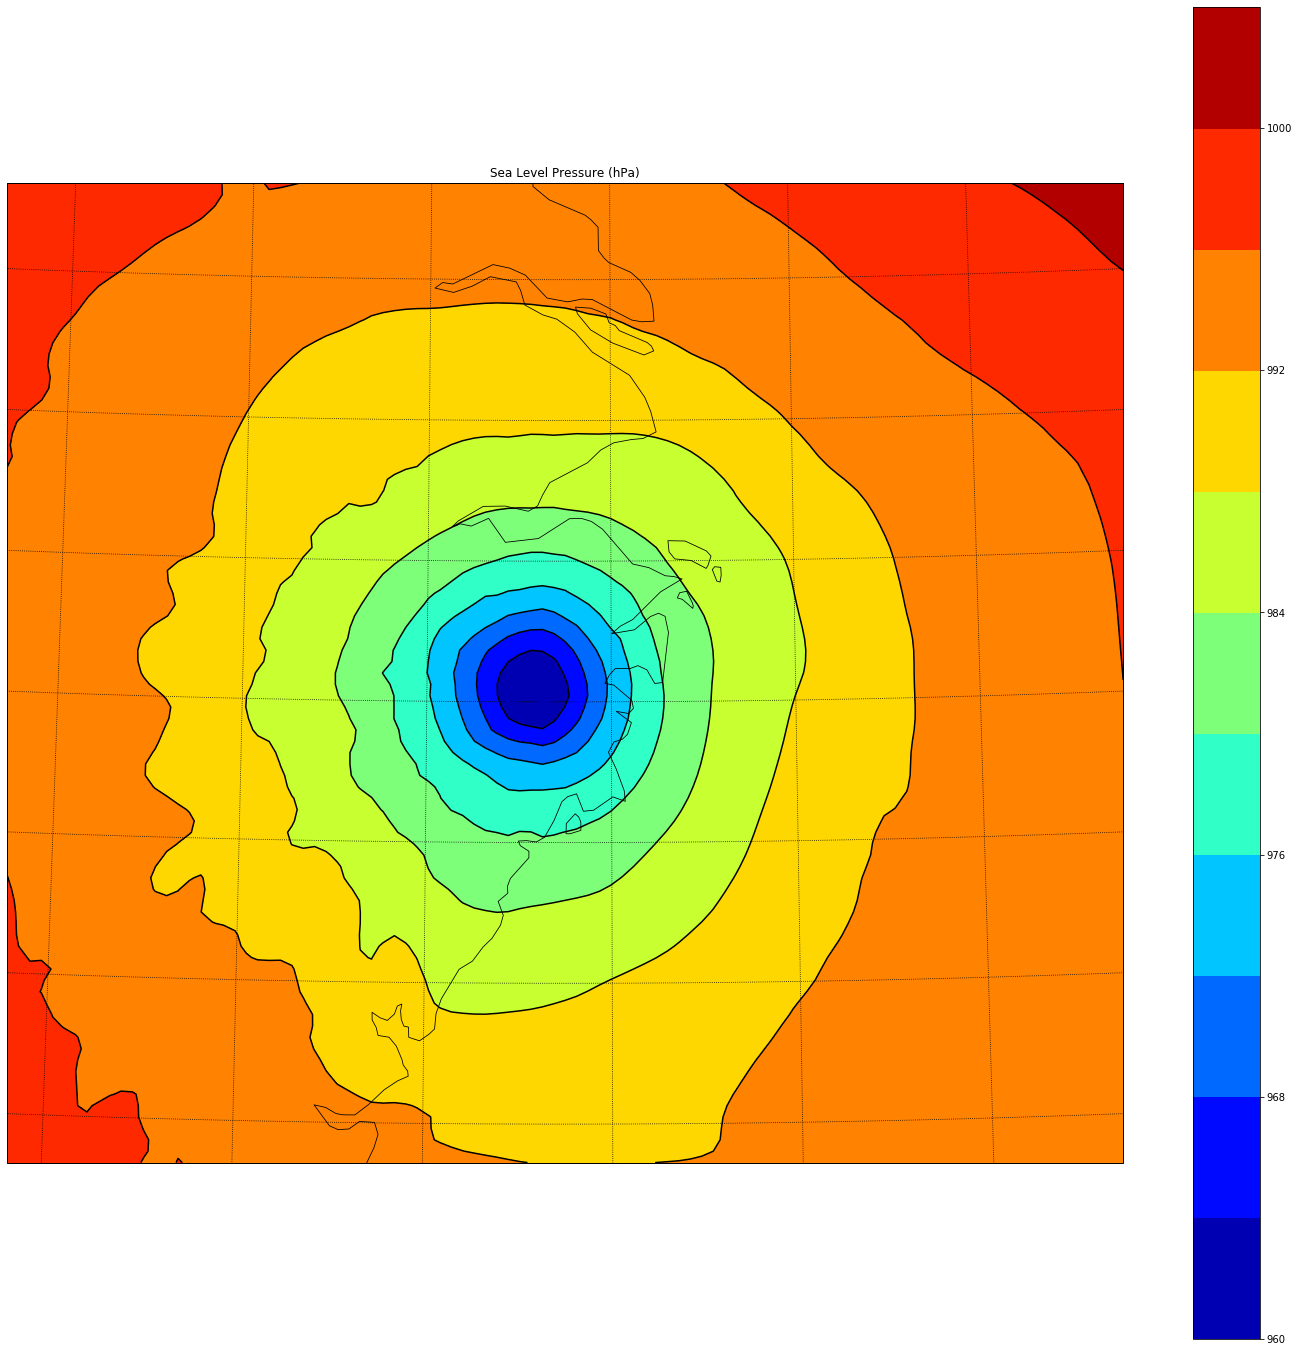

<xarray.DataArray 'slp' (south_north: 87, west_east: 99)>
array([[ 997.1107 ,  997.1813 ,  997.3397 , ...,  995.13116,  995.26587,
         995.40985],
       [ 997.0569 ,  996.77576,  997.37445, ...,  995.15515,  995.2762 ,
         995.38824],
       [ 997.05786,  996.84357,  997.70886, ...,  995.14557,  995.2659 ,
         995.3761 ],
       ...,
       [ 998.24084,  998.17255,  998.08154, ..., 1000.7414 , 1000.88605,
        1000.89954],
       [ 998.33997,  998.28046,  998.2025 , ..., 1000.8915 , 1001.0292 ,
        1001.05634],
       [ 998.4297 ,  998.3688 ,  998.2998 , ..., 1000.9884 , 1001.1078 ,
        1001.2238 ]], dtype=float32)
Coordinates:
    XLONG    (south_north, west_east) float32 116.731964 116.82153 ... 125.8266
    XLAT     (south_north, west_east) float32 25.653107 25.65609 ... 32.605465
    XTIME    float32 1260.0
    Time     datetime64[ns] 2019-08-10T03:00:00
Dimensions without coordinates: south_north, west_east
Attributes:
    FieldType:    104
    MemoryOrder:  XY
    description:  sea level pressure
    units:        hPa
    stagger:      
    coordinates:  XLONG XLAT XTIME
    projection:   LambertConformal(stand_lon=121.125, moad_cen_lat=29.2059783...

In [32]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.cm import get_cmap
import cartopy.crs as crs
from cartopy.feature import NaturalEarthFeature
from netCDF4 import Dataset
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import cartopy.crs as crs
from cartopy.feature import NaturalEarthFeature

from wrf import (to_np, getvar, smooth2d, get_cartopy, cartopy_xlim,
                 cartopy_ylim, latlon_coords)

from wrf import to_np, getvar, CoordPair, vertcross
path = "/home/liyuan3970/Data/demo4_run2/"

filename = path+ "wrfout01.nc"
ncfile = Dataset(filename)
#print(ncfile)
slp = getvar(ncfile, "slp",timeidx=7)


smooth_slp = smooth2d(slp, 3, cenweight=4)

# Get the latitude and longitude points
lats, lons = latlon_coords(slp)

# Get the cartopy mapping object
cart_proj = get_cartopy(slp)

# Create a figure
fig = plt.figure(figsize=(25,25))
# Set the GeoAxes to the projection used by WRF
ax = plt.axes(projection=cart_proj)

# Download and add the states and coastlines
states = NaturalEarthFeature(category="cultural", scale="50m",
                             facecolor="none",
                             name="admin_1_states_provinces_shp")
#ax.add_feature(states, linewidth=.5, edgecolor="black")
ax.coastlines('50m', linewidth=0.8)

# Make the contour outlines and filled contours for the smoothed sea level
# pressure.
plt.contour(to_np(lons), to_np(lats), to_np(smooth_slp), 10, colors="black",
            transform=crs.PlateCarree())
plt.contourf(to_np(lons), to_np(lats), to_np(smooth_slp), 10,
             transform=crs.PlateCarree(),
             cmap=get_cmap("jet"))

# Add a color bar
plt.colorbar(ax=ax, shrink=.98)

# Set the map bounds
ax.set_xlim(cartopy_xlim(smooth_slp))
ax.set_ylim(cartopy_ylim(smooth_slp))

# Add the gridlines
ax.gridlines(color="black", linestyle="dotted")

plt.title("Sea Level Pressure (hPa)")

plt.show()

slp

# 台风降水
1. 目录位置
```
/home/liyuan3970/Typhoon_LMQ/data/ncl/precipation/demo2.ncl
````



In [5]:
ls /home/liyuan3970/Typhoon_LMQ/data/ncl/precipation/*

/home/liyuan3970/Typhoon_LMQ/data/ncl/precipation/demo2.ncl
/home/liyuan3970/Typhoon_LMQ/data/ncl/precipation/demo.ncl
/home/liyuan3970/Typhoon_LMQ/data/ncl/precipation/precipitaion_2019-08-09_06:00:00-2019-08-10_18:00:00UTC.png
/home/liyuan3970/Typhoon_LMQ/data/ncl/precipation/precipitaion_2019-08-09_16:00:00-2019-08-10_02:00:00UTC.png


# 括苍山垂直速度分布

[ 0 20 40 60 80] [    0.        197.07199   394.14398   591.216     788.28796   985.36
  1182.432    1379.5039   1576.5759   1773.648    1970.72     2167.792
  2364.864    2561.9358   2759.0078   2956.0798   3153.1519   3350.2239
  3547.296    3744.368    3941.44     4138.5117   4335.584    4532.656
  4729.728    4926.8      5123.8716   5320.944    5518.0156   5715.088
  5912.1597   6109.232    6306.3037   6503.376    6700.4478   6897.5195
  7094.592    7291.6636   7488.736    7685.8076   7882.88     8079.9517
  8277.023    8474.096    8671.168    8868.239    9065.312    9262.384
  9459.456    9656.527    9853.6     10050.672   10247.743   10444.815
 10641.888   10838.96    11036.031   11233.104   11430.176   11627.247
 11824.319   12021.392   12218.464   12415.535   12612.607   12809.68
 13006.752   13203.823   13400.8955  13597.968   13795.039   13992.111
 14189.184   14386.256   14583.327   14780.399   14977.472   15174.543
 15371.615   15568.6875  15765.76    15962.831   16159.903 

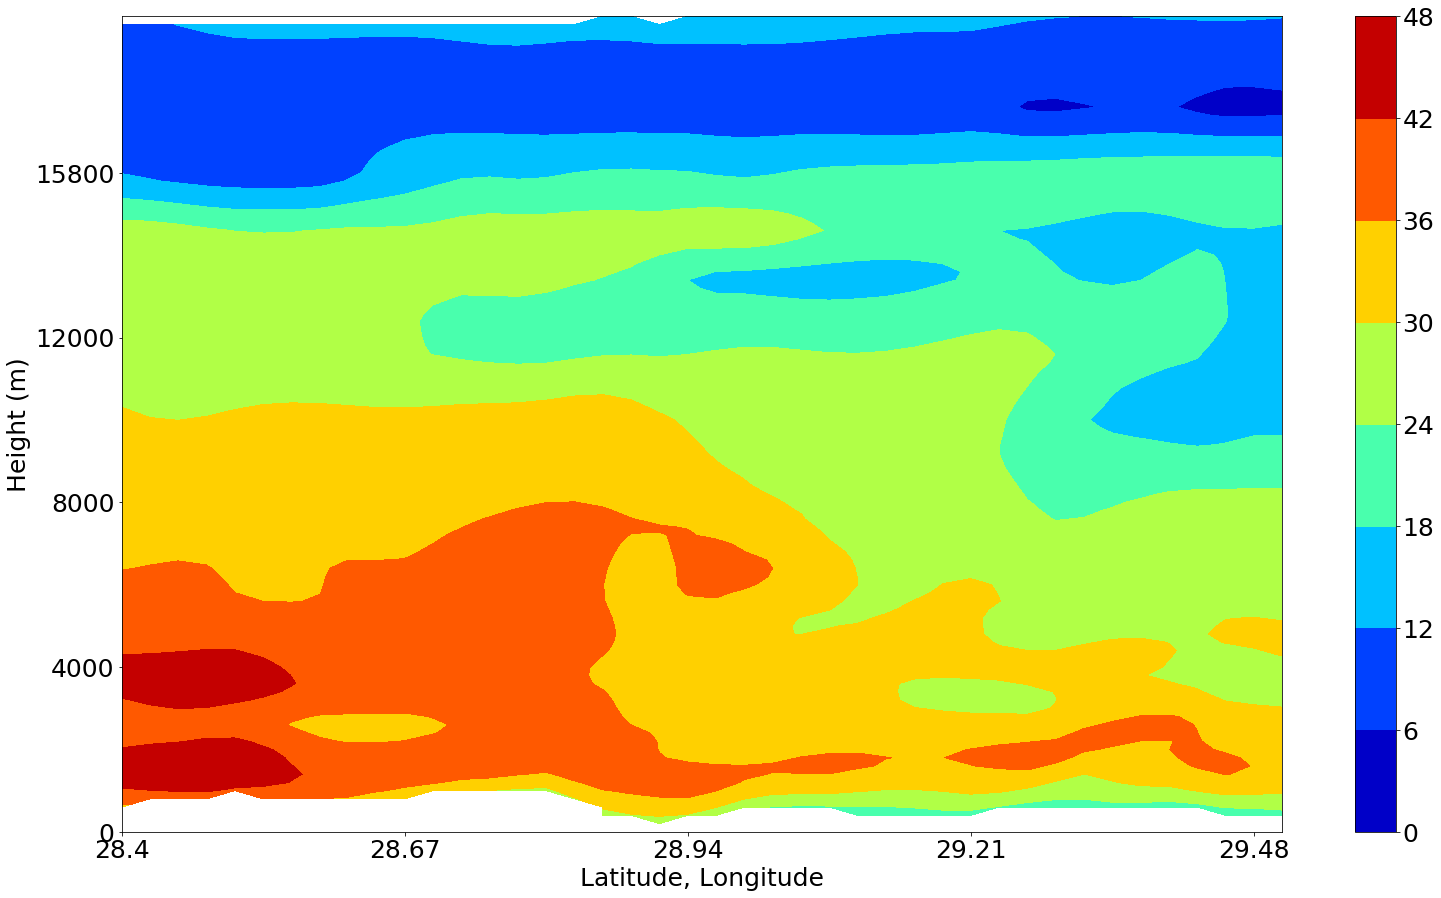

In [30]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.cm import get_cmap
import cartopy.crs as crs
from cartopy.feature import NaturalEarthFeature
from netCDF4 import Dataset

from wrf import to_np, getvar, CoordPair, vertcross

# Open the NetCDF file

path = "/home/liyuan3970/Data/demo4_run2/"

filename = path+ "wrfout_d02_2019-08-09_060000.nc"
ncfile = Dataset(filename)

# Extract the model height and wind speed
z = getvar(ncfile, "z")
#wspd =  getvar(ncfile, "uvmet_wspd_wdir",timeidx=60, units="kt")[0,:]
wspd =  getvar(ncfile, "uvmet_wspd_wdir",timeidx=85, units="m s-1")[0,:]
# Create the start point and end point for the cross section
start_point = CoordPair(lat= 28.4, lon=120.9)
end_point = CoordPair(lat=29.5, lon=120.9)

# Compute the vertical cross-section interpolation.  Also, include the
# lat/lon points along the cross-section.
wspd_cross = vertcross(wspd, z, wrfin=ncfile, start_point=start_point,
                       end_point=end_point, latlon=True, meta=True)

# Create the figure
fig = plt.figure(figsize=(26,15))
ax = plt.axes()

# Make the contour plot
wspd_contours = ax.contourf(to_np(wspd_cross), cmap=get_cmap("jet"))

# Add the color bar
plt.rcParams['font.size'] = 25
plt.colorbar(wspd_contours, ax=ax)

# Set the x-ticks to use latitude and longitude labels.
coord_pairs = to_np(wspd_cross.coords["xy_loc"])
x_ticks = np.arange(coord_pairs.shape[0])
x_labels = [pair.latlon_str(fmt="{:.2f}, {:.2f}")
            for pair in to_np(coord_pairs)]
x_table = [28.4,28.67,28.94,29.21,29.48]
ax.set_xticks(x_ticks[::10])
# ax.set_xticklabels(x_labels[::20], rotation=0, fontsize=25)
ax.set_xticklabels(x_table, rotation=0, fontsize=25)
# Set the y-ticks to be height.
vert_vals = to_np(wspd_cross.coords["vertical"])
v_ticks = np.arange(vert_vals.shape[0])

print(v_ticks[::20],vert_vals[:])
y_table = [0,4000,8000,12000,15800]
ax.set_yticks(v_ticks[::20])
ax.set_yticklabels(y_table, fontsize=25)
#ax.set_yticklabels(vert_vals[::20], fontsize=25)

# Set the x-axis and  y-axis labels
ax.set_xlabel("Latitude, Longitude", fontsize=25)
ax.set_ylabel("Height (m)", fontsize=25)
#plt.ylim(0,12000)
# plt.title("Vertical Cross Section of Wind Speed (kt)")
plt.savefig('../picture/wrf_speed.png')
# plt.savefig('../图片包/括苍山图/'+'括苍山速度图')
plt.show()

# V剖面

[ 0 10 20 30 40 50 60 70 80 90] [    0.        197.07199   394.14398   591.216     788.28796   985.36
  1182.432    1379.5039   1576.5759   1773.648    1970.72     2167.792
  2364.864    2561.9358   2759.0078   2956.0798   3153.1519   3350.2239
  3547.296    3744.368    3941.44     4138.5117   4335.584    4532.656
  4729.728    4926.8      5123.8716   5320.944    5518.0156   5715.088
  5912.1597   6109.232    6306.3037   6503.376    6700.4478   6897.5195
  7094.592    7291.6636   7488.736    7685.8076   7882.88     8079.9517
  8277.023    8474.096    8671.168    8868.239    9065.312    9262.384
  9459.456    9656.527    9853.6     10050.672   10247.743   10444.815
 10641.888   10838.96    11036.031   11233.104   11430.176   11627.247
 11824.319   12021.392   12218.464   12415.535   12612.607   12809.68
 13006.752   13203.823   13400.8955  13597.968   13795.039   13992.111
 14189.184   14386.256   14583.327   14780.399   14977.472   15174.543
 15371.615   15568.6875  15765.76    15962.8

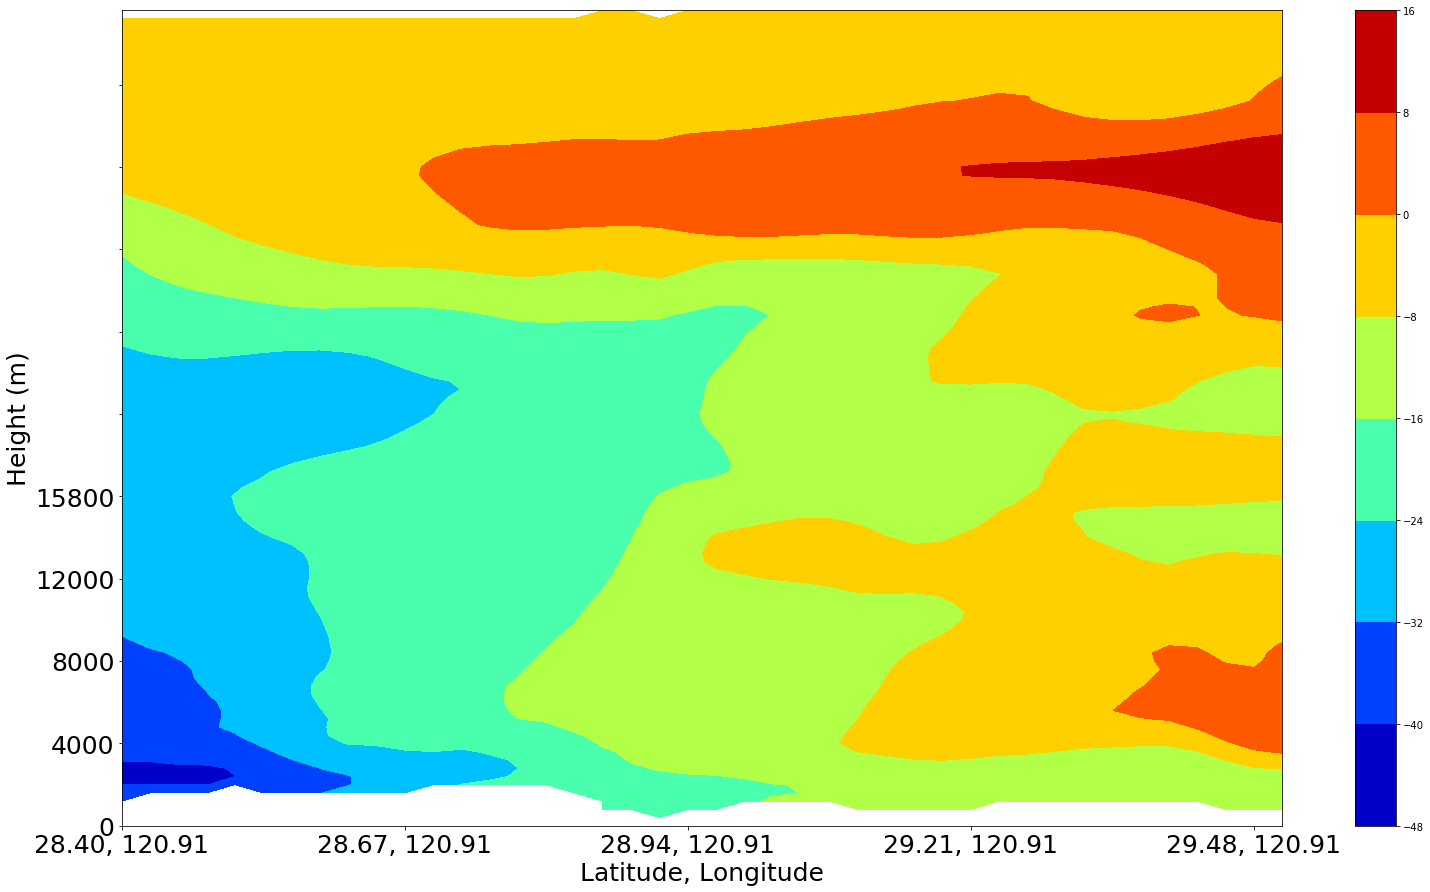

In [29]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.cm import get_cmap
import cartopy.crs as crs
from cartopy.feature import NaturalEarthFeature
from netCDF4 import Dataset

from wrf import to_np, getvar, CoordPair, vertcross

# Open the NetCDF file

path = "/home/liyuan3970/Data/demo4_run2/"

filename = path+ "wrfout_d02_2019-08-09_060000.nc"
ncfile = Dataset(filename)

# Extract the model height and wind speed
z = getvar(ncfile, "z")
#wspd =  getvar(ncfile, "uvmet_wspd_wdir",timeidx=60, units="kt")[0,:]
wspd =  getvar(ncfile, "va",timeidx=85, units="m s-1")#[0,:]
# Create the start point and end point for the cross section
start_point = CoordPair(lat= 28.4, lon=120.9)
end_point = CoordPair(lat=29.5, lon=120.9)

# Compute the vertical cross-section interpolation.  Also, include the
# lat/lon points along the cross-section.
wspd_cross = vertcross(wspd, z, wrfin=ncfile, start_point=start_point,
                       end_point=end_point, latlon=True, meta=True)

# Create the figure
fig = plt.figure(figsize=(26,15))
ax = plt.axes()

# Make the contour plot
wspd_contours = ax.contourf(to_np(wspd_cross), cmap=get_cmap("jet"))

# Add the color bar
plt.colorbar(wspd_contours, ax=ax)

# Set the x-ticks to use latitude and longitude labels.
coord_pairs = to_np(wspd_cross.coords["xy_loc"])
x_ticks = np.arange(coord_pairs.shape[0])
x_labels = [pair.latlon_str(fmt="{:.2f}, {:.2f}")
            for pair in to_np(coord_pairs)]
x_table = [28.4,28.9,29.5]
ax.set_xticks(x_ticks[::10])
ax.set_xticklabels(x_labels[::10], rotation=0, fontsize=25)
# ax.set_xticklabels(x_table, rotation=0, fontsize=25)
# Set the y-ticks to be height.
vert_vals = to_np(wspd_cross.coords["vertical"])
v_ticks = np.arange(vert_vals.shape[0])

print(v_ticks[::10],vert_vals[:])
y_table = [0,4000,8000,12000,15800]
ax.set_yticks(v_ticks[::10])
ax.set_yticklabels(y_table, fontsize=25)
#ax.set_yticklabels(vert_vals[::20], fontsize=25)

# Set the x-axis and  y-axis labels
ax.set_xlabel("Latitude, Longitude", fontsize=25)
ax.set_ylabel("Height (m)", fontsize=25)
#plt.ylim(0,12000)
# plt.title("Vertical Cross Section of Wind Speed (kt)")
plt.savefig('../picture/wrf_speed.png')
# plt.savefig('../图片包/括苍山图/'+'括苍山速度图')
plt.show()

# cin

[ 0 20 40 60 80] [    0.        197.07199   394.14398   591.216     788.28796   985.36
  1182.432    1379.5039   1576.5759   1773.648    1970.72     2167.792
  2364.864    2561.9358   2759.0078   2956.0798   3153.1519   3350.2239
  3547.296    3744.368    3941.44     4138.5117   4335.584    4532.656
  4729.728    4926.8      5123.8716   5320.944    5518.0156   5715.088
  5912.1597   6109.232    6306.3037   6503.376    6700.4478   6897.5195
  7094.592    7291.6636   7488.736    7685.8076   7882.88     8079.9517
  8277.023    8474.096    8671.168    8868.239    9065.312    9262.384
  9459.456    9656.527    9853.6     10050.672   10247.743   10444.815
 10641.888   10838.96    11036.031   11233.104   11430.176   11627.247
 11824.319   12021.392   12218.464   12415.535   12612.607   12809.68
 13006.752   13203.823   13400.8955  13597.968   13795.039   13992.111
 14189.184   14386.256   14583.327   14780.399   14977.472   15174.543
 15371.615   15568.6875  15765.76    15962.831   16159.903 

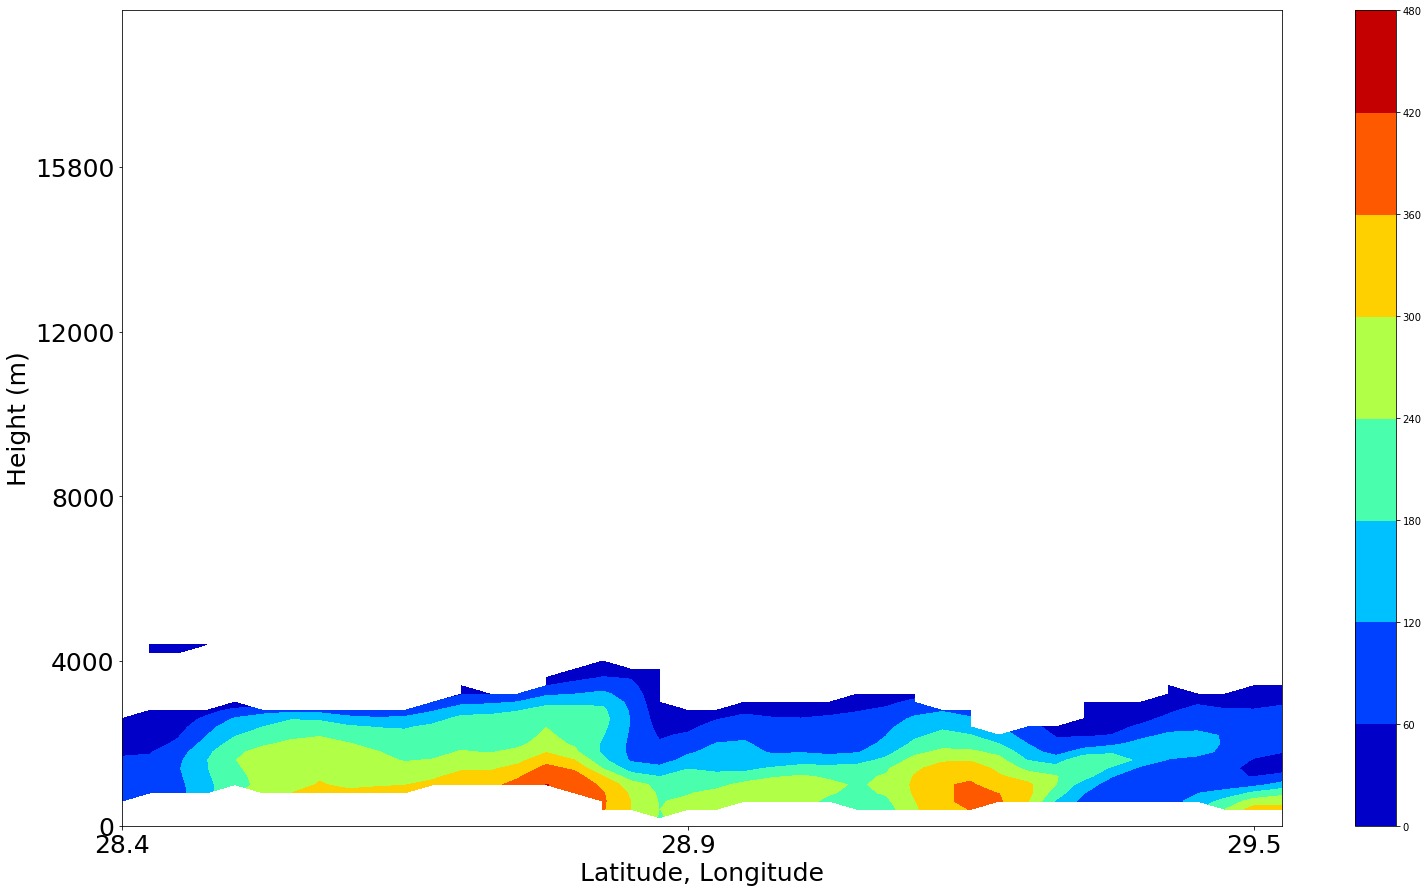

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.cm import get_cmap
import cartopy.crs as crs
from cartopy.feature import NaturalEarthFeature
from netCDF4 import Dataset

from wrf import to_np, getvar, CoordPair, vertcross

# Open the NetCDF file

path = "/home/liyuan3970/Data/demo4_run2/"

filename = path+ "wrfout_d02_2019-08-09_060000.nc"
ncfile = Dataset(filename)

# Extract the model height and wind speed
z = getvar(ncfile, "z")
#wspd =  getvar(ncfile, "uvmet_wspd_wdir",timeidx=60, units="kt")[0,:]
wspd =  getvar(ncfile, "cape_3d",timeidx=85)[0,:,:,:]
# Create the start point and end point for the cross section
start_point = CoordPair(lat= 28.4, lon=120.9)
end_point = CoordPair(lat=29.5, lon=120.9)

# Compute the vertical cross-section interpolation.  Also, include the
# lat/lon points along the cross-section.
wspd_cross = vertcross(wspd, z, wrfin=ncfile, start_point=start_point,
                       end_point=end_point, latlon=True, meta=True)

# Create the figure
fig = plt.figure(figsize=(26,15))
ax = plt.axes()

# Make the contour plot
wspd_contours = ax.contourf(to_np(wspd_cross), cmap=get_cmap("jet"))

# Add the color bar
plt.colorbar(wspd_contours, ax=ax)

# Set the x-ticks to use latitude and longitude labels.
coord_pairs = to_np(wspd_cross.coords["xy_loc"])
x_ticks = np.arange(coord_pairs.shape[0])
x_labels = [pair.latlon_str(fmt="{:.2f}, {:.2f}")
            for pair in to_np(coord_pairs)]
x_table = [28.4,28.9,29.5]
ax.set_xticks(x_ticks[::20])
#ax.set_xticklabels(x_labels[::20], rotation=0, fontsize=25)
ax.set_xticklabels(x_table, rotation=0, fontsize=25)
# Set the y-ticks to be height.
vert_vals = to_np(wspd_cross.coords["vertical"])
v_ticks = np.arange(vert_vals.shape[0])

print(v_ticks[::20],vert_vals[:])
y_table = [0,4000,8000,12000,15800]
ax.set_yticks(v_ticks[::20])
ax.set_yticklabels(y_table, fontsize=25)
#ax.set_yticklabels(vert_vals[::20], fontsize=25)

# Set the x-axis and  y-axis labels
ax.set_xlabel("Latitude, Longitude", fontsize=25)
ax.set_ylabel("Height (m)", fontsize=25)
#plt.ylim(0,12000)
# plt.title("Vertical Cross Section of Wind Speed (kt)")
#plt.savefig('../picture/wrf_speed.png')
# plt.savefig('../图片包/括苍山图/'+'括苍山速度图')
plt.show()

# 相对湿度

[ 0 20 40 60 80] [    0.        197.07199   394.14398   591.216     788.28796   985.36
  1182.432    1379.5039   1576.5759   1773.648    1970.72     2167.792
  2364.864    2561.9358   2759.0078   2956.0798   3153.1519   3350.2239
  3547.296    3744.368    3941.44     4138.5117   4335.584    4532.656
  4729.728    4926.8      5123.8716   5320.944    5518.0156   5715.088
  5912.1597   6109.232    6306.3037   6503.376    6700.4478   6897.5195
  7094.592    7291.6636   7488.736    7685.8076   7882.88     8079.9517
  8277.023    8474.096    8671.168    8868.239    9065.312    9262.384
  9459.456    9656.527    9853.6     10050.672   10247.743   10444.815
 10641.888   10838.96    11036.031   11233.104   11430.176   11627.247
 11824.319   12021.392   12218.464   12415.535   12612.607   12809.68
 13006.752   13203.823   13400.8955  13597.968   13795.039   13992.111
 14189.184   14386.256   14583.327   14780.399   14977.472   15174.543
 15371.615   15568.6875  15765.76    15962.831   16159.903 

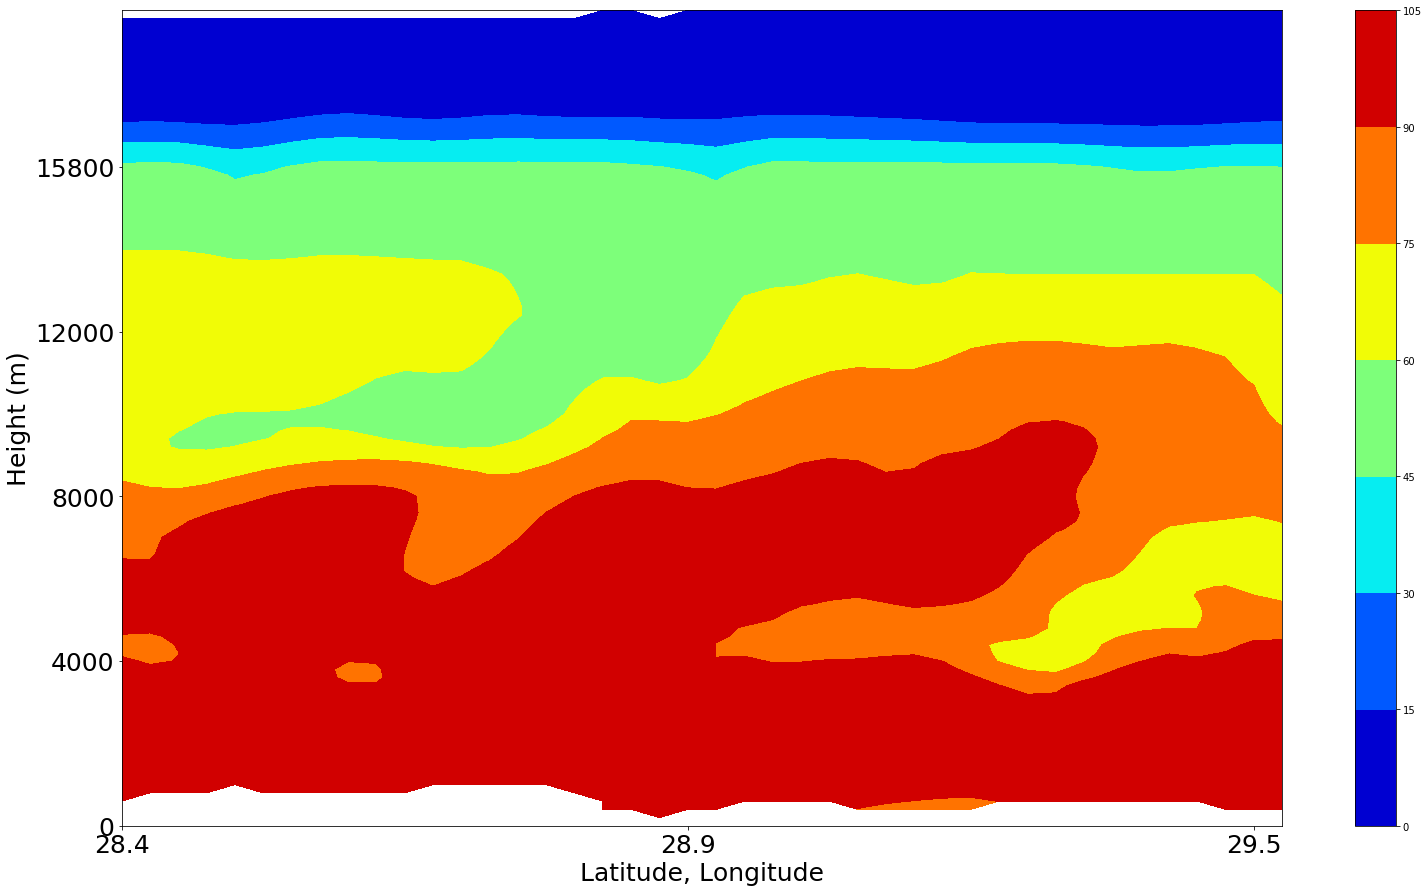

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.cm import get_cmap
import cartopy.crs as crs
from cartopy.feature import NaturalEarthFeature
from netCDF4 import Dataset

from wrf import to_np, getvar, CoordPair, vertcross

# Open the NetCDF file

path = "/home/liyuan3970/Data/demo4_run2/"

filename = path+ "wrfout_d02_2019-08-09_060000.nc"
ncfile = Dataset(filename)

# Extract the model height and wind speed
z = getvar(ncfile, "z")
#wspd =  getvar(ncfile, "uvmet_wspd_wdir",timeidx=60, units="kt")[0,:]
wspd =  getvar(ncfile, "rh",timeidx=85)#[0:,:,:]
# Create the start point and end point for the cross section
start_point = CoordPair(lat= 28.4, lon=120.9)
end_point = CoordPair(lat=29.5, lon=120.9)

# Compute the vertical cross-section interpolation.  Also, include the
# lat/lon points along the cross-section.
wspd_cross = vertcross(wspd, z, wrfin=ncfile, start_point=start_point,
                       end_point=end_point, latlon=True, meta=True)

# Create the figure
fig = plt.figure(figsize=(26,15))
ax = plt.axes()

# Make the contour plot
wspd_contours = ax.contourf(to_np(wspd_cross), cmap=get_cmap("jet"))

# Add the color bar
plt.colorbar(wspd_contours, ax=ax)

# Set the x-ticks to use latitude and longitude labels.
coord_pairs = to_np(wspd_cross.coords["xy_loc"])
x_ticks = np.arange(coord_pairs.shape[0])
x_labels = [pair.latlon_str(fmt="{:.2f}, {:.2f}")
            for pair in to_np(coord_pairs)]
x_table = [28.4,28.9,29.5]
ax.set_xticks(x_ticks[::20])
#ax.set_xticklabels(x_labels[::20], rotation=0, fontsize=25)
ax.set_xticklabels(x_table, rotation=0, fontsize=25)
# Set the y-ticks to be height.
vert_vals = to_np(wspd_cross.coords["vertical"])
v_ticks = np.arange(vert_vals.shape[0])

print(v_ticks[::20],vert_vals[:])
y_table = [0,4000,8000,12000,15800]
ax.set_yticks(v_ticks[::20])
ax.set_yticklabels(y_table, fontsize=25)
#ax.set_yticklabels(vert_vals[::20], fontsize=25)

# Set the x-axis and  y-axis labels
ax.set_xlabel("Latitude, Longitude", fontsize=25)
ax.set_ylabel("Height (m)", fontsize=25)
#plt.ylim(0,12000)
# plt.title("Vertical Cross Section of Wind Speed (kt)")
#plt.savefig('../picture/wrf_speed.png')
# plt.savefig('../图片包/括苍山图/'+'括苍山速度图')
plt.show()

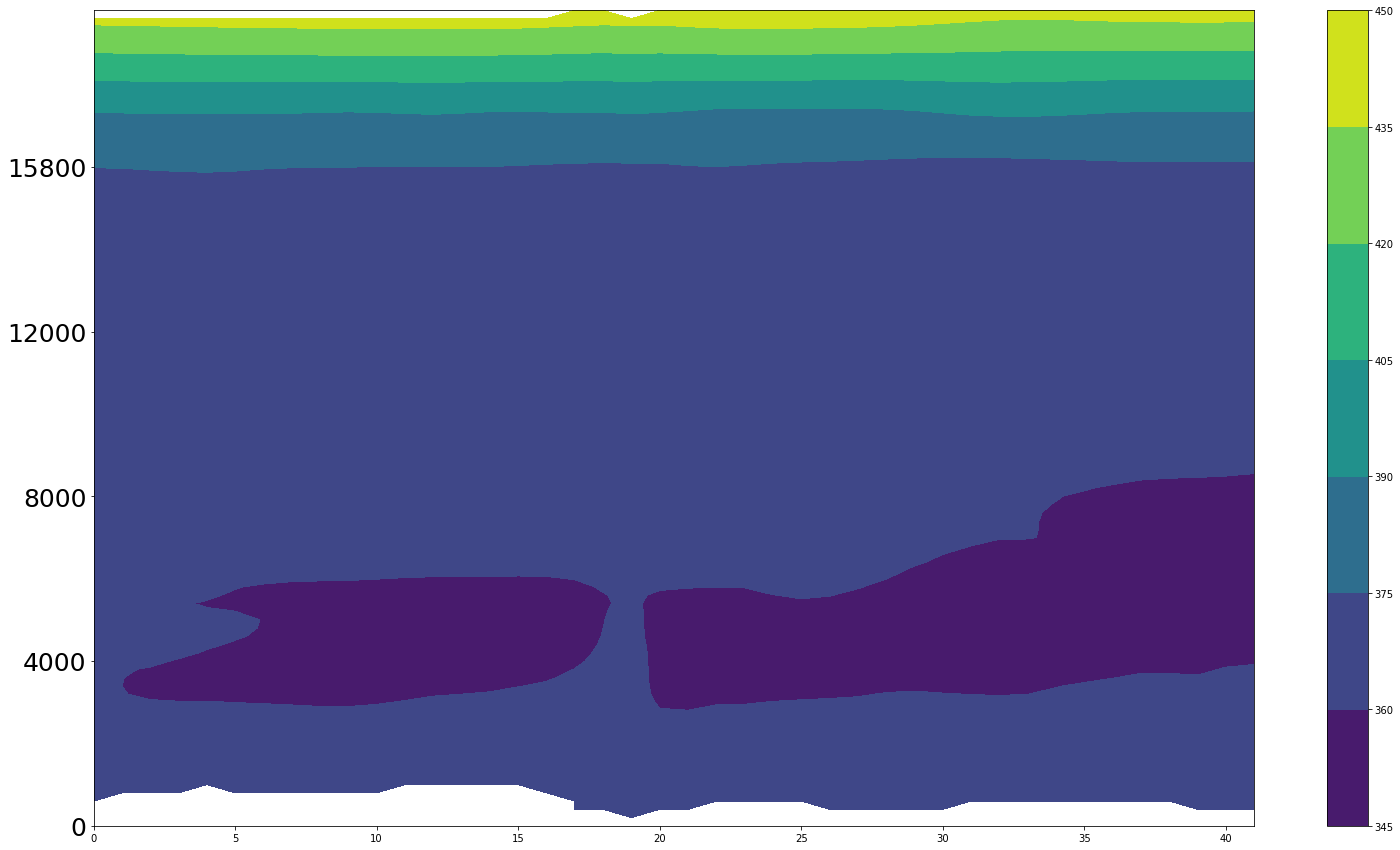

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.cm import get_cmap
import cartopy.crs as crs
from cartopy.feature import NaturalEarthFeature
from netCDF4 import Dataset

from wrf import to_np, getvar, CoordPair, vertcross

# Open the NetCDF file

path = "/home/liyuan3970/Data/demo4_run2/"

filename = path+ "wrfout_d02_2019-08-09_060000.nc"
ncfile = Dataset(filename)

# Extract the model height and wind speed
z = getvar(ncfile, "z")
#wspd =  getvar(ncfile, "uvmet_wspd_wdir",timeidx=60, units="kt")[0,:]
wspd =  getvar(ncfile, "eth",timeidx=85)#[0:,:,:]
# Create the start point and end point for the cross section
start_point = CoordPair(lat= 28.4, lon=120.9)
end_point = CoordPair(lat=29.5, lon=120.9)

# Compute the vertical cross-section interpolation.  Also, include the
# lat/lon points along the cross-section.
wspd_cross = vertcross(wspd, z, wrfin=ncfile, start_point=start_point,
                       end_point=end_point, latlon=True, meta=True)

# Create the figure
fig = plt.figure(figsize=(26,15))
ax = plt.axes()

# Make the contour plot
#wspd_contours = ax.contourf(to_np(wspd_cross), cmap=get_cmap("jet"))
wspd_contours = ax.contourf(to_np(wspd_cross))
# Add the color bar
plt.colorbar(wspd_contours, ax=ax)

# # Set the x-ticks to use latitude and longitude labels.
# coord_pairs = to_np(wspd_cross.coords["xy_loc"])
# x_ticks = np.arange(coord_pairs.shape[0])
# x_labels = [pair.latlon_str(fmt="{:.2f}, {:.2f}")
#             for pair in to_np(coord_pairs)]
# x_table = [28.4,28.9,29.5]
# ax.set_xticks(x_ticks[::20])
# #ax.set_xticklabels(x_labels[::20], rotation=0, fontsize=25)
# ax.set_xticklabels(x_table, rotation=0, fontsize=25)
# Set the y-ticks to be height.
vert_vals = to_np(wspd_cross.coords["vertical"])
v_ticks = np.arange(vert_vals.shape[0])

# print(v_ticks[::20],vert_vals[:])
y_table = [0,4000,8000,12000,15800]
ax.set_yticks(v_ticks[::20])
ax.set_yticklabels(y_table, fontsize=25)
#ax.set_yticklabels(vert_vals[::20], fontsize=25)

# # Set the x-axis and  y-axis labels
# ax.set_xlabel("Latitude, Longitude", fontsize=25)
# ax.set_ylabel("Height (m)", fontsize=25)
#plt.ylim(0,12000)
# plt.title("Vertical Cross Section of Wind Speed (kt)")
#plt.savefig('../picture/wrf_speed.png')
# plt.savefig('../图片包/括苍山图/'+'括苍山速度图')
plt.show()

# 山顶处的雷达回波

[    0.        195.58441   391.16882   586.75323   782.33765   977.92206
  1173.5065   1369.091    1564.6753   1760.2598   1955.8441   2151.4285
  2347.013    2542.5974   2738.182    2933.766    3129.3506   3324.935
  3520.5195   3716.1038   3911.6882   4107.2725   4302.857    4498.4414
  4694.026    4889.6104   5085.195    5280.7793   5476.364    5671.948
  5867.532    6063.1167   6258.701    6454.2856   6649.87     6845.4546
  7041.039    7236.6235   7432.2075   7627.792    7823.3765   8018.961
  8214.545    8410.13     8605.714    8801.299    8996.883    9192.468
  9388.052    9583.637    9779.221    9974.805   10170.39    10365.974
 10561.559   10757.143   10952.728   11148.312   11343.896   11539.48
 11735.064   11930.649   12126.233   12321.818   12517.402   12712.987
 12908.571   13104.155   13299.74    13495.324   13690.909   13886.493
 14082.078   14277.662   14473.247   14668.831   14864.415   15060.
 15255.584   15451.169   15646.753   15842.338   16037.922   16233.507
 1642

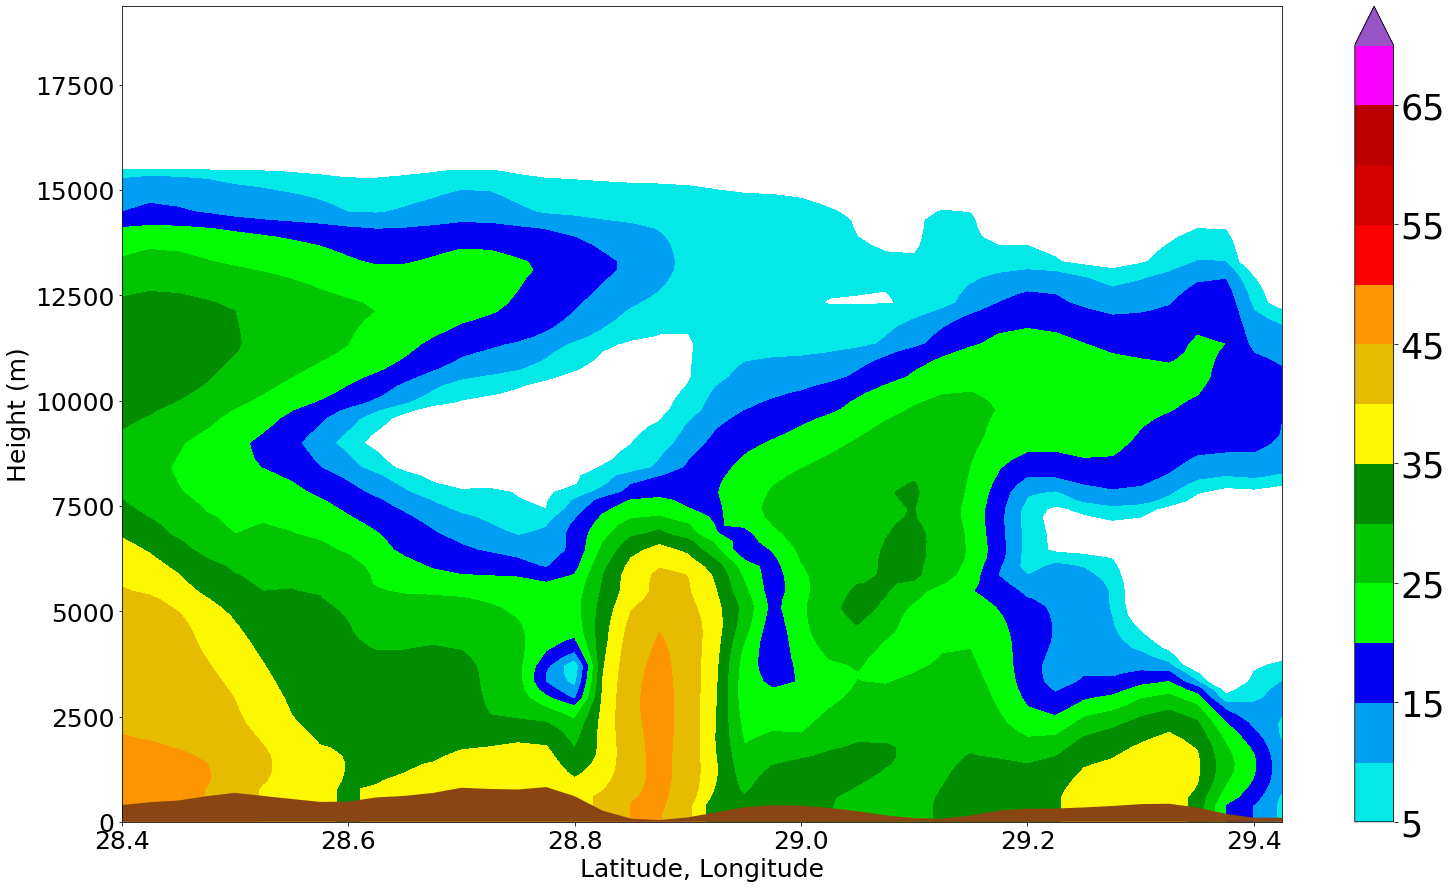

In [7]:
import numpy as np
from matplotlib import pyplot
from matplotlib.cm import get_cmap
from matplotlib.colors import from_levels_and_colors
from cartopy import crs
from cartopy.feature import NaturalEarthFeature, COLORS
from netCDF4 import Dataset
from wrf import (getvar, to_np, get_cartopy, latlon_coords, vertcross,
                 cartopy_xlim, cartopy_ylim, interpline, CoordPair)

filepath = "/home/liyuan3970/Data/demo4_run2/"
wrf_file = Dataset(filepath+"wrfout_d02_2019-08-09_060000.nc")

# Define the cross section start and end points
cross_start = CoordPair(lat=28.4, lon=120.9)
cross_end = CoordPair(lat=29.5, lon=120.9)

# Get the WRF variables
ht = getvar(wrf_file, "z", timeidx=89)
ter = getvar(wrf_file, "ter", timeidx=89)
dbz = getvar(wrf_file, "dbz", timeidx=85)
max_dbz = getvar(wrf_file, "mdbz", timeidx=89)
Z = 10**(dbz/10.) # Use linear Z for interpolation

# Compute the vertical cross-section interpolation.  Also, include the
# lat/lon points along the cross-section in the metadata by setting latlon
# to True.
z_cross = vertcross(Z, ht, wrfin=wrf_file,
                    start_point=cross_start,
                    end_point=cross_end,
                    latlon=True, meta=True)

# Convert back to dBz after interpolation
dbz_cross = 10.0 * np.log10(z_cross)

# Add back the attributes that xarray dropped from the operations above
dbz_cross.attrs.update(z_cross.attrs)
dbz_cross.attrs["description"] = "radar reflectivity cross section"
dbz_cross.attrs["units"] = "dBZ"

# To remove the slight gap between the dbz contours and terrain due to the
# contouring of gridded data, a new vertical grid spacing, and model grid
# staggering, fill in the lower grid cells with the first non-missing value
# for each column.

# Make a copy of the z cross data. Let's use regular numpy arrays for this.
dbz_cross_filled = np.ma.copy(to_np(dbz_cross))

# For each cross section column, find the first index with non-missing
# values and copy these to the missing elements below.
for i in range(dbz_cross_filled.shape[-1]):
    column_vals = dbz_cross_filled[:,i]
    # Let's find the lowest index that isn't filled. The nonzero function
    # finds all unmasked values greater than 0. Since 0 is a valid value
    # for dBZ, let's change that threshold to be -200 dBZ instead.
    first_idx = int(np.transpose((column_vals > -200).nonzero())[0])
    dbz_cross_filled[0:first_idx, i] = dbz_cross_filled[first_idx, i]

# Get the terrain heights along the cross section line
ter_line = interpline(ter, wrfin=wrf_file, start_point=cross_start,
                      end_point=cross_end)

# Get the lat/lon points
lats, lons = latlon_coords(dbz)

# Get the cartopy projection object
cart_proj = get_cartopy(dbz)

# Create the figure
fig = pyplot.figure(figsize=(26,15))
ax_cross = pyplot.axes()

dbz_levels = np.arange(5., 75., 5.)

# Create the color table found on NWS pages.
dbz_rgb = np.array([[4,233,231],
                    [1,159,244], [3,0,244],
                    [2,253,2], [1,197,1],
                    [0,142,0], [253,248,2],
                    [229,188,0], [253,149,0],
                    [253,0,0], [212,0,0],
                    [188,0,0],[248,0,253],
                    [152,84,198]], np.float32) / 255.0

dbz_map, dbz_norm = from_levels_and_colors(dbz_levels, dbz_rgb,
                                           extend="max")

# Make the cross section plot for dbz
dbz_levels = np.arange(5.,75.,5.)
xs = np.arange(0, dbz_cross.shape[-1], 1)
ys = to_np(dbz_cross.coords["vertical"])
print(ys)
dbz_contours = ax_cross.contourf(xs,
                                 ys,
                                 to_np(dbz_cross_filled),
                                 levels=dbz_levels,
                                 cmap=dbz_map,
                                 norm=dbz_norm,
                                 extend="max")
# Add the color bar

cb_dbz = fig.colorbar(dbz_contours, ax=ax_cross)
cb_dbz.ax.tick_params(labelsize=35)

# Fill in the mountain area
ht_fill = ax_cross.fill_between(xs, 0, to_np(ter_line),
                                facecolor="saddlebrown")

# Set the x-ticks to use latitude and longitude labels
coord_pairs = to_np(dbz_cross.coords["xy_loc"])
x_ticks = np.arange(coord_pairs.shape[0])
x_labels = [pair.latlon_str() for pair in to_np(coord_pairs)]

# Set the y-ticks to be height.
vert_vals = to_np(z_cross.coords["vertical"])
v_ticks = np.arange(vert_vals.shape[0])


# Set the desired number of x ticks below
num_ticks = 5
thin = int((len(x_ticks) / num_ticks) + .5)
x_table = [28.4,28.6,28.8,29.0,29.2,29.4]
ax_cross.set_xticks(x_ticks[::thin])
ax_cross.set_xticklabels(x_table, rotation=0, fontsize=25)
print(v_ticks[::20])
y_table = [0,2500,5000,7500,10000,12500,15000,17500]
#ax_cross.set_yticks(v_ticks[::20])
ax_cross.set_yticklabels(y_table, fontsize=25)
# Set the x-axis and  y-axis labels
ax_cross.set_xlabel("Latitude, Longitude", fontsize=25)
ax_cross.set_ylabel("Height (m)", fontsize=25)

# Add a title
# ax_cross.set_title("Cross-Section of Reflectivity (dBZ)", {"fontsize" : 14})
plt.savefig('../picture/wrf_dez.png')
pyplot.show()


In [ ]:
## plot all

In [ ]:
import numpy as np
from matplotlib import pyplot
from matplotlib.cm import get_cmap
from matplotlib.colors import from_levels_and_colors
from cartopy import crs
from cartopy.feature import NaturalEarthFeature, COLORS
from netCDF4 import Dataset
from wrf import (getvar, to_np, get_cartopy, latlon_coords, vertcross,
                 cartopy_xlim, cartopy_ylim, interpline, CoordPair)


def plot(num):
    number = num
    filepath = "/home/liyuan3970/Data/demo4_run2/"
    wrf_file = Dataset(filepath+"wrfout_d02_2019-08-09_060000.nc")
    # Define the cross section start and end points
    cross_start = CoordPair(lat=28.4, lon=120.9)
    cross_end = CoordPair(lat=29.5, lon=120.9)
    # Get the WRF variables
    ht = getvar(wrf_file, "z", timeidx=89)
    ter = getvar(wrf_file, "ter", timeidx=89)
    dbz = getvar(wrf_file, "dbz", timeidx=int(number))
    max_dbz = getvar(wrf_file, "mdbz", timeidx=89)
    Z = 10**(dbz/10.) # Use linear Z for interpolation
    # Compute the vertical cross-section interpolation.  Also, include the
    # lat/lon points along the cross-section in the metadata by setting latlon
    # to True.
    z_cross = vertcross(Z, ht, wrfin=wrf_file,
                        start_point=cross_start,
                        end_point=cross_end,
                        latlon=True, meta=True)
    # Convert back to dBz after interpolation
    dbz_cross = 10.0 * np.log10(z_cross)
    # Add back the attributes that xarray dropped from the operations above
    dbz_cross.attrs.update(z_cross.attrs)
    dbz_cross.attrs["description"] = "radar reflectivity cross section"
    dbz_cross.attrs["units"] = "dBZ"
    # To remove the slight gap between the dbz contours and terrain due to the
    # contouring of gridded data, a new vertical grid spacing, and model grid
    # staggering, fill in the lower grid cells with the first non-missing value
    # for each column.
    # Make a copy of the z cross data. Let's use regular numpy arrays for this.
    dbz_cross_filled = np.ma.copy(to_np(dbz_cross))
    # For each cross section column, find the first index with non-missing
    # values and copy these to the missing elements below.
    for i in range(dbz_cross_filled.shape[-1]):
        column_vals = dbz_cross_filled[:,i]
        # Let's find the lowest index that isn't filled. The nonzero function
        # finds all unmasked values greater than 0. Since 0 is a valid value
        # for dBZ, let's change that threshold to be -200 dBZ instead.
        first_idx = int(np.transpose((column_vals > -200).nonzero())[0])
        dbz_cross_filled[0:first_idx, i] = dbz_cross_filled[first_idx, i]
    # Get the terrain heights along the cross section line
    ter_line = interpline(ter, wrfin=wrf_file, start_point=cross_start,
                          end_point=cross_end)
    # Get the lat/lon points
    lats, lons = latlon_coords(dbz)
    # Get the cartopy projection object
    cart_proj = get_cartopy(dbz)
    # Create the figure
    fig = pyplot.figure(figsize=(26,15))
    ax_cross = pyplot.axes()
    dbz_levels = np.arange(5., 75., 5.)
    # Create the color table found on NWS pages.
    dbz_rgb = np.array([[4,233,231],
                        [1,159,244], [3,0,244],
                        [2,253,2], [1,197,1],
                        [0,142,0], [253,248,2],
                        [229,188,0], [253,149,0],
                        [253,0,0], [212,0,0],
                        [188,0,0],[248,0,253],
                        [152,84,198]], np.float32) / 255.0
    dbz_map, dbz_norm = from_levels_and_colors(dbz_levels, dbz_rgb,
                                               extend="max")
    # Make the cross section plot for dbz
    dbz_levels = np.arange(5.,75.,5.)
    xs = np.arange(0, dbz_cross.shape[-1], 1)
    ys = to_np(dbz_cross.coords["vertical"])
    print(ys)
    dbz_contours = ax_cross.contourf(xs,
                                     ys,
                                     to_np(dbz_cross_filled),
                                     levels=dbz_levels,
                                     cmap=dbz_map,
                                     norm=dbz_norm,
                                     extend="max")
    # Add the color bar
    cb_dbz = fig.colorbar(dbz_contours, ax=ax_cross)
    cb_dbz.ax.tick_params(labelsize=8)
    # Fill in the mountain area
    ht_fill = ax_cross.fill_between(xs, 0, to_np(ter_line),
                                    facecolor="saddlebrown")
    # Set the x-ticks to use latitude and longitude labels
    coord_pairs = to_np(dbz_cross.coords["xy_loc"])
    x_ticks = np.arange(coord_pairs.shape[0])
    x_labels = [pair.latlon_str() for pair in to_np(coord_pairs)]
    # Set the y-ticks to be height.
    vert_vals = to_np(z_cross.coords["vertical"])
    v_ticks = np.arange(vert_vals.shape[0])
    # Set the desired number of x ticks below
    num_ticks = 5
    thin = int((len(x_ticks) / num_ticks) + .5)
    x_table = [28.4,28.6,28.8,29.0,29.2,29.4]
    ax_cross.set_xticks(x_ticks[::thin])
    ax_cross.set_xticklabels(x_table, rotation=0, fontsize=25)
    print(v_ticks[::20])
    y_table = [0,2500,5000,7500,10000,12500,15000,17500]
    #ax_cross.set_yticks(v_ticks[::20])
    ax_cross.set_yticklabels(y_table, fontsize=25)
    # Set the x-axis and  y-axis labels
    ax_cross.set_xlabel("Latitude, Longitude", fontsize=25)
    ax_cross.set_ylabel("Height (m)", fontsize=25)
    
    # Add a title
    ax_cross.set_title("Cross-Section of Reflectivity (dBZ)"+number, {"fontsize" : 14})
    plt.savefig('../picture/dbz/'+str(number))
    pyplot.show()
for i in range(70,90,1):
    it=str(i)
    plot(it)

# 反演风场的坡面分析

(15, 3)
geog (120,)
lats (120,)
120.61667
(23, 120)


/home/liyuan3970/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: DeprecationWarning:

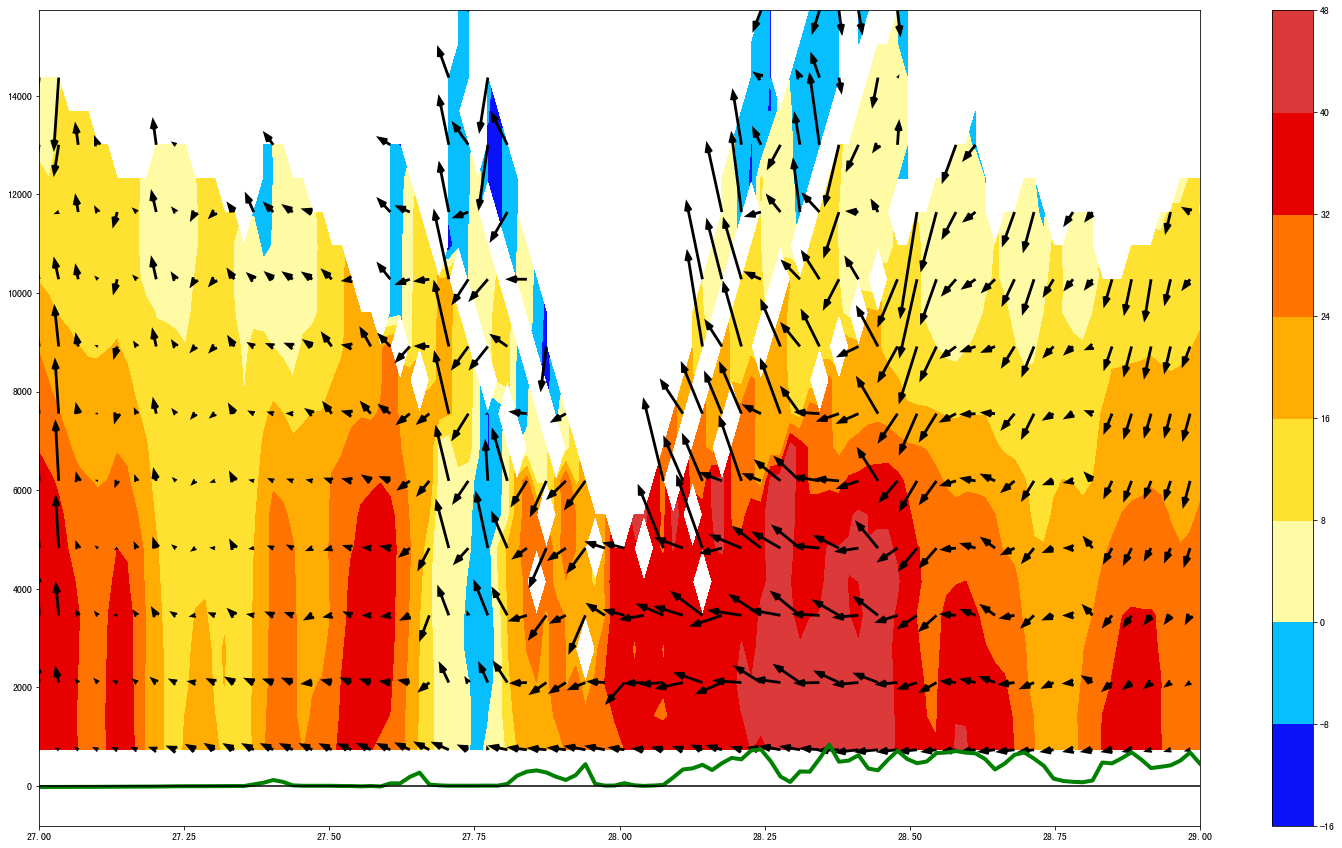

In [26]:
from matplotlib import cm, colors

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from ncmaps import Cmaps

#设置rgb
fid = open('/home/liyuan3970/study_demo/met_plot/利齐马/src/radar.rgb')
data=fid.readlines()
n=len(data);
#print(n)
rgb=np.zeros((n,3))
for i in np.arange(n):
    #print(data[0].split(' '))
    rgb[i][0]=float(data[i].split(' ')[0])
    rgb[i][1]=data[i].split(' ')[1]
    rgb[i][2]=data[i].split(' ')[2]
print((rgb.shape))
#print(rgb[253])
rgb_file = 'ncl_default'
self_define_list = [24,85,132,148,158,168,188,220,240]
cmaps = Cmaps(rgb_file,self_define_list).listmap()
#cmaps= colors.ListedColormap(rgb)




fig = plt.figure(figsize=[26, 15])
from netCDF4 import Dataset
f = Dataset('/home/liyuan3970/Data/test_demo/meto/垂直剖面/location.nc')

lons = f.variables['lon'][:]
lats = f.variables['lat'][::]
heigh = f.variables['heigh'][:]
#print(heigh)
#print(level)
lon_sing =97
u = f.variables['u'][:,:,lon_sing]
v = f.variables['v'][:,:,lon_sing]
w = f.variables['w'][:,:,lon_sing]
ref = f.variables['ref'][:,:,lon_sing]
geog = f.variables['geog'][:,lon_sing]
print('geog',geog.shape)
print('lats',lats.shape)
#x = f.variables['x'][:]
#print(x[90])
print(lons[lon_sing])
print(u.shape)


# Contour Plot
X, Y = np.meshgrid(lats, heigh)
Z = ref
cp = plt.contourf(X, Y, Z,cmap = cmaps)
cb = plt.colorbar(cp)


# Vector Field

x,y= np.meshgrid(lats[::2], heigh[::2])

U =v[::2,::2]
V = w[::2,::2]*20
speed = np.sqrt(U**2 + V**2)

quiv = plt.quiver(x, y, U, V,  # assign to var
           color='Black', 
           headlength=4)


#y轴的数字是x轴数字的平方
plt.plot(lats,geog,c='green',linewidth=4)
y_values = np.zeros([120,1])
plt.plot(lats,y_values,c='black')
plt.savefig('../图片包/括苍山图/'+'括苍山风场反演')
#plt.plot(geog)
plt.show()

# 数值模式的切向风场

[   0.         71.834175  143.66835   215.50252   287.3367    359.17087
  431.00504   502.83923   574.6734    646.50757   718.34174   790.1759
  862.0101    933.8443   1005.67847  1077.5126   1149.3468   1221.181
 1293.0151   1364.8494   1436.6835   1508.5177   1580.3518   1652.186
 1724.0201   1795.8544   1867.6886   1939.5227   2011.3569   2083.1912
 2155.0251   2226.8594   2298.6936   2370.5278   2442.362    2514.196
 2586.0303   2657.8645   2729.6987   2801.5327   2873.367    2945.2012
 3017.0354   3088.8696   3160.7036   3232.5378   3304.372    3376.2063
 3448.0403   3519.8745   3591.7087   3663.543    3735.3772   3807.2112
 3879.0454   3950.8796   4022.7139   4094.5479   4166.3823   4238.2163
 4310.0503   4381.885    4453.7188   4525.553    4597.387    4669.221
 4741.0557   4812.8896   4884.724    4956.558    5028.392    5100.2266
 5172.0605   5243.8945   5315.729    5387.563    5459.3975   5531.2314
 5603.0654   5674.9      5746.734    5818.5684   5890.4023   5962.2363
 6034.071

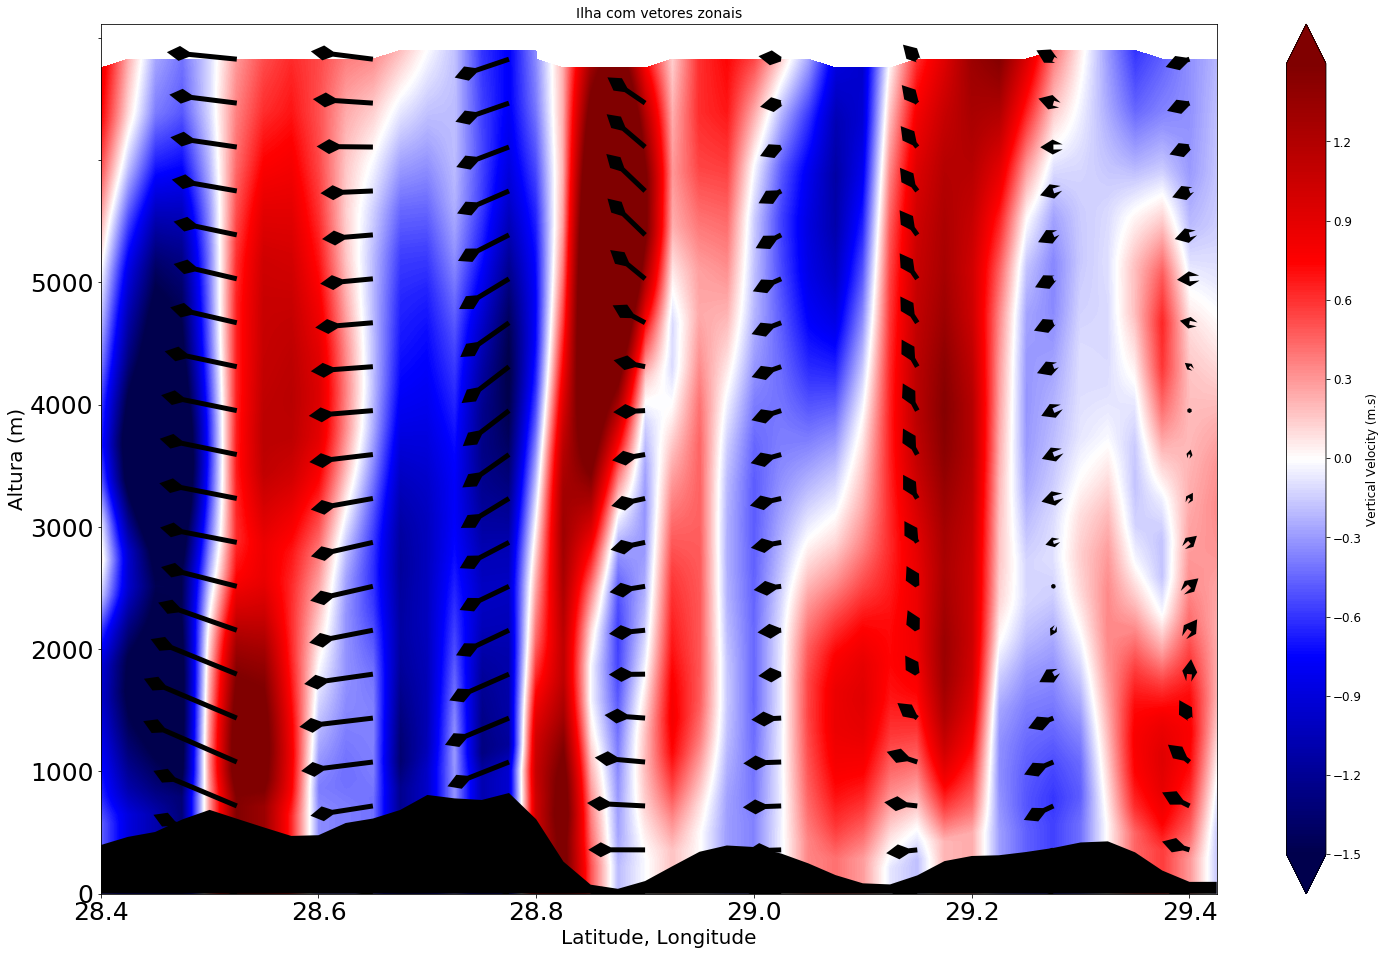

In [18]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from matplotlib.colors import from_levels_and_colors
from cartopy import crs
from cartopy.feature import NaturalEarthFeature, COLORS
from netCDF4 import Dataset
from wrf import (getvar, to_np, get_cartopy, latlon_coords, vertcross,
                 cartopy_xlim, cartopy_ylim, interpline, CoordPair)
filepath = "/home/liyuan3970/Data/demo4_run2/"
wrf_file =Dataset(filepath+"wrfout_d02_2019-08-09_060000.nc")

# Define the cross section start and end points
cross_start = CoordPair(lat=28.4, lon=120.9)
cross_end = CoordPair(lat=29.5, lon=120.9)

# Get the WRF variables
ht = getvar(wrf_file, "z", timeidx=87)
ht = ht[0:20,:,:]
ter = getvar(wrf_file, "ter", timeidx=87)

w = getvar(wrf_file, "wa", timeidx=85)
w = w[0:20,:,:]

u = getvar(wrf_file, "va", timeidx=87)
u = u[0:20,:,:]

max_dbz = getvar(wrf_file, "mdbz", timeidx=60)

W = 10**(w/10.) # Use linear Z for interpolation

w_cross = vertcross(W, ht, wrfin=wrf_file,
                    start_point=cross_start,
                    end_point=cross_end,
                    latlon=True, meta=True)

U = 10**(u/10.) # Use linear Z for interpolation

u_cross = vertcross(U, ht, wrfin=wrf_file,
                    start_point=cross_start,
                    end_point=cross_end,
                    latlon=True, meta=True)

# Convert back to dBz after interpolation
w_cross = 10.0 * np.log10(w_cross)
u_cross = 10.0 * np.log10(u_cross)

# Add back the attributes that xarray dropped from the operations above
w_cross.attrs.update(w_cross.attrs)
w_cross.attrs["description"] = "destaggered w-wind component"
w_cross.attrs["units"] = "m s-1"

# Add back the attributes that xarray dropped from the operations above
u_cross.attrs.update(u_cross.attrs)
u_cross.attrs["description"] = "destaggered u-wind component"
u_cross.attrs["units"] = "m s-1"

# To remove the slight gap between the dbz contours and terrain due to the
# contouring of gridded data, a new vertical grid spacing, and model grid
# staggering, fill in the lower grid cells with the first non-missing value
# for each column.

# Make a copy of the z cross data. Let's use regular numpy arrays for this.
w_cross_filled = np.ma.copy(to_np(w_cross))
u_cross_filled = np.ma.copy(to_np(u_cross))

# For each cross section column, find the first index with non-missing
# values and copy these to the missing elements below.
for i in range(w_cross_filled.shape[-1]):
    column_vals = w_cross_filled[:,i]
    # Let's find the lowest index that isn't filled. The nonzero function
    # finds all unmasked values greater than 0. Since 0 is a valid value
    # for dBZ, let's change that threshold to be -200 dBZ instead.
    first_idx = int(np.transpose((column_vals > -200).nonzero())[0])
    w_cross_filled[0:first_idx, i] = w_cross_filled[first_idx, i]

# For each cross section column, find the first index with non-missing
# values and copy these to the missing elements below.
for i in range(u_cross_filled.shape[-1]):
    column_vals = u_cross_filled[:,i]
    # Let's find the lowest index that isn't filled. The nonzero function
    # finds all unmasked values greater than 0. Since 0 is a valid value
    # for dBZ, let's change that threshold to be -200 dBZ instead.
    first_idx = int(np.transpose((column_vals > -200).nonzero())[0])
    u_cross_filled[0:first_idx, i] = u_cross_filled[first_idx, i]

# Get the terrain heights along the cross section line
ter_line = interpline(ter, wrfin=wrf_file, start_point=cross_start,
                      end_point=cross_end)

# Get the lat/lon points
lats, lons = latlon_coords(w)

# Get the cartopy projection object
cart_proj = get_cartopy(w)

# Create the figure
fig = pyplot.figure(figsize=(25,16))
ax_cross = pyplot.axes()

# Make the cross section plot for dbz
w_levels = np.arange(-4E-1, +4E-1, 5E-2)
xs = np.arange(0, w_cross.shape[-1], 1)
ys = to_np(w_cross.coords["vertical"])
w_levels = np.arange(-15E-1, +15E-1, 5E-3)
print(ys)################################################################################################################
print(xs)################################################################################################################
w_contours = ax_cross.contourf(xs,
                                 ys,
                                 to_np(w_cross_filled),
                                 levels=w_levels,
                                 cmap='seismic',

                                 extend="both")
# Add the color bar
cbar = fig.colorbar(w_contours, ax=ax_cross)
cbar.ax.tick_params(labelsize=12)
cbar.set_label('Vertical Velocity (m.s)', rotation=-270, fontsize=12)
# Fill in the mountain area
ht_fill = ax_cross.fill_between(xs, 0, to_np(ter_line),
                                facecolor="black")

# Tentativa do quiver

ax_cross.quiver(xs[::5], ys[::5],
          to_np(u_cross_filled[::5, ::5]), to_np(w_cross_filled[::5, ::5]*10),headlength=2.5)
# ax_cross.bar(xs[::2], ys[::2],
#           to_np(u_cross_filled[::2, ::2]), to_np(w_cross_filled[::2, ::2]*30),headlength=2)
# Set the x-ticks to use latitude and longitude labels
coord_pairs = to_np(u_cross.coords["xy_loc"])
x_ticks = np.arange(coord_pairs.shape[0])
x_labels = [pair.latlon_str() for pair in to_np(coord_pairs)]

# Set the desired number of x ticks below
num_ticks = 5
thin = int((len(x_ticks) / num_ticks) + .5)
x_table = [28.4,28.6,28.8,29.0,29.2,29.4]
ax_cross.set_xticks(x_ticks[::thin])
ax_cross.set_xticklabels(x_table, rotation=0, fontsize=25)


# Set the x-axis and  y-axis labels
ax_cross.set_xlabel("Latitude, Longitude", fontsize=20)
ax_cross.set_ylabel("Altura (m)", fontsize=20)
y_table = [0,1000,2000,3000,4000,5000]
#ax_cross.set_yticks(v_ticks[::20])
ax_cross.set_yticklabels(y_table, fontsize=25)
# Add a title
ax_cross.set_title("Ilha com vetores zonais", {"fontsize" : 14})

pyplot.show()
#plt.savefig('../图片包/括苍山图/'+'括苍山数值实验风场反演')

# fig.savefig('../图片包/括苍山图/'+'括苍山数值实验风场反演', dpi=None, facecolor='w', edgecolor='w',
#         orientation='portrait', papertype=None, format=None,
#         transparent=False, bbox_inches=None, pad_inches=0.1,
#         frameon=None, metadata=None)

#############
[5, 10, 15, 20]


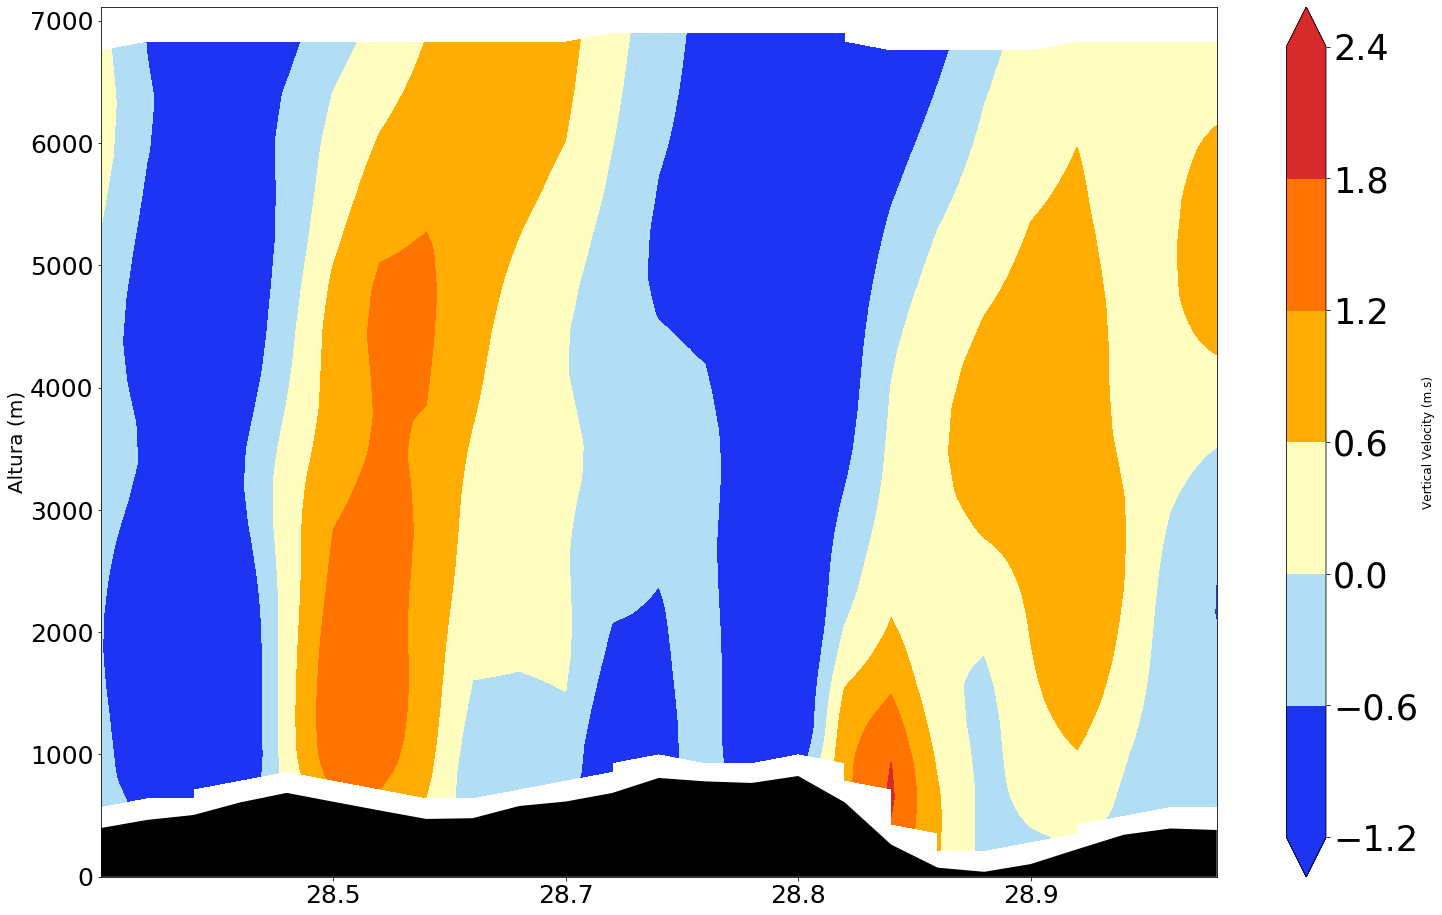

In [6]:
%matplotlib inline
from math import*
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from matplotlib.colors import from_levels_and_colors
from cartopy import crs
from cartopy.feature import NaturalEarthFeature, COLORS
from netCDF4 import Dataset
from wrf import (getvar, to_np, get_cartopy, latlon_coords, vertcross,
                 cartopy_xlim, cartopy_ylim, interpline, CoordPair)
filepath = "/home/liyuan3970/Data/demo4_run2/"
wrf_file =Dataset(filepath+"wrfout_d02_2019-08-09_060000.nc")

# Define the cross section start and end points
cross_start = CoordPair(lat=28.4, lon=120.9)
cross_end = CoordPair(lat=29.5, lon=120.9)

# Get the WRF variables
ht = getvar(wrf_file, "z", timeidx=87)
ht = ht[0:20,:,:]
ter = getvar(wrf_file, "ter", timeidx=87)

w = getvar(wrf_file, "wa", timeidx=87)
w = w[0:20,:,:]

u = getvar(wrf_file, "va", timeidx=87)
u = u[0:20,:,:]

#max_dbz = getvar(wrf_file, "mdbz", timeidx=60)

#W = 10**(w/10.) # Use linear Z for interpolation

w_cross = vertcross(w, ht, wrfin=wrf_file,
                    start_point=cross_start,
                    end_point=cross_end,
                    latlon=True, meta=True)
# print(w_cross.max())
# print(w_cross.min())
# U = 10**(u/10.) # Use linear Z for interpolation

# u_cross = vertcross(U, ht, wrfin=wrf_file,
#                     start_point=cross_start,
#                     end_point=cross_end,
#                     latlon=True, meta=True)

# Convert back to dBz after interpolation
# w_cross = 10.0 * np.log10(w_cross)
# u_cross = 10.0 * np.log10(u_cross)

# Add back the attributes that xarray dropped from the operations above
w_cross.attrs.update(w_cross.attrs)
w_cross.attrs["description"] = "destaggered w-wind component"
w_cross.attrs["units"] = "m s-1"

# Add back the attributes that xarray dropped from the operations above
# u_cross.attrs.update(u_cross.attrs)
# u_cross.attrs["description"] = "destaggered u-wind component"
# u_cross.attrs["units"] = "m s-1"

# To remove the slight gap between the dbz contours and terrain due to the
# contouring of gridded data, a new vertical grid spacing, and model grid
# staggering, fill in the lower grid cells with the first non-missing value
# for each column.

# Make a copy of the z cross data. Let's use regular numpy arrays for this.
# w_cross_filled = np.ma.copy(to_np(w_cross))
# u_cross_filled = np.ma.copy(to_np(u_cross))

# For each cross section column, find the first index with non-missing
# values and copy these to the missing elements below.
# for i in range(w_cross_filled.shape[-1]):
#     column_vals = w_cross_filled[:,i]
#     # Let's find the lowest index that isn't filled. The nonzero function
#     # finds all unmasked values greater than 0. Since 0 is a valid value
#     # for dBZ, let's change that threshold to be -200 dBZ instead.
#     first_idx = int(np.transpose((column_vals > -200).nonzero())[0])
#     w_cross_filled[0:first_idx, i] = w_cross_filled[first_idx, i]

# For each cross section column, find the first index with non-missing
# values and copy these to the missing elements below.
# for i in range(u_cross_filled.shape[-1]):
#     column_vals = u_cross_filled[:,i]
#     # Let's find the lowest index that isn't filled. The nonzero function
#     # finds all unmasked values greater than 0. Since 0 is a valid value
#     # for dBZ, let's change that threshold to be -200 dBZ instead.
#     first_idx = int(np.transpose((column_vals > -200).nonzero())[0])
#     u_cross_filled[0:first_idx, i] = u_cross_filled[first_idx, i]

# Get the terrain heights along the cross section line
ter_line = interpline(ter, wrfin=wrf_file, start_point=cross_start,
                      end_point=cross_end)

# Get the lat/lon points
lats, lons = latlon_coords(w)

# Get the cartopy projection object
cart_proj = get_cartopy(w)

# Create the figure
fig = pyplot.figure(figsize=(25,16))
ax_cross = pyplot.axes()

# Make the cross section plot for dbz
# w_levels = np.arange(-4E-1, +4E-1, 5E-2)
xs = np.arange(0, w_cross.shape[-1], 1)
ys = to_np(w_cross.coords["vertical"])

##########h绘图
from ncmaps import Cmaps
self_define_list = [30,68,117,128,148,168,188,208,238]
rgb_file = 'ncl_default'
#以下是核心api,实质为调用Cmaps基类的listmap()方法
cmaps = Cmaps('ncl_default',self_define_list).listmap()
levels = [-1.2,-0.6,0,0.6,1.2,1.8,2.4]


w_levels = np.arange(-15E-1, +15E-1, 5E-3)
# print(ys)################################################################################################################
# print(xs)################################################################################################################
# print(to_np(w_cross_filled))
# print(to_np(w_cross_filled).shape,ys.shape,xs.shape)





w_contours = ax_cross.contourf(xs[:25],
                                 ys[0:],
                                 to_np(w_cross)[0:,:25],
                                 levels=levels,
                                 cmap=cmaps,
                                 extend="both")
# w_contours = ax_cross.contourf(xs[0:10],
#                                  ys[0:36],
#                                  to_np(w_cross_filled)[0:36,0:10],
#                                  levels=w_levels,
#                                  cmap='seismic',
#                                  extend="both")
# Add the color bar
cbar = fig.colorbar(w_contours, ax=ax_cross)
cbar.ax.tick_params(labelsize=35)
cbar.set_label('Vertical Velocity (m.s)', rotation=-270, fontsize=12)
# Fill in the mountain area
# print(to_np(ter_line),to_np(ter_line).shape)
ht_fill = ax_cross.fill_between(xs[:25], 0, to_np(ter_line)[:25],
                                facecolor="black")

# Tentativa do quiver

# ax_cross.quiver(xs[::5], ys[::5],
#           to_np(u_cross_filled[::5, ::5]), to_np(w_cross_filled[::5, ::5]*10),headlength=2.5)
# ax_cross.bar(xs[::2], ys[::2],
#           to_np(u_cross_filled[::2, ::2]), to_np(w_cross_filled[::2, ::2]*30),headlength=2)
# Set the x-ticks to use latitude and longitude labels
# coord_pairs = to_np(w_cross.coords["xy_loc"])
# x_ticks = np.arange(coord_pairs.shape[0])
# x_labels = [pair.latlon_str() for pair in to_np(coord_pairs)]

# # # Set the desired number of x ticks below
# num_ticks = 5
# thin = int((len(x_ticks) / num_ticks) + .5)
x_table = [28.5,28.7,28.8,28.9]
print("#############")
x_ticks=[5,10,15,20]
print(x_ticks)
ax_cross.set_xticks(x_ticks[:])
ax_cross.set_xticklabels(x_table, rotation=0, fontsize=25)


# Set the x-axis and  y-axis labels
# ax_cross.set_xlabel("Latitude, Longitude", fontsize=20)
ax_cross.set_ylabel("Altura (m)", fontsize=20)
y_table = [0,1000,2000,3000,4000,5000,6000,7000]
# ax_cross.set_yticks(v_ticks[::20])
ax_cross.set_yticklabels(y_table, fontsize=25)
# # Add a title
# ax_cross.set_title("Ilha com vetores zonais", {"fontsize" : 14})
plt.savefig('../picture/wrf_w.png')
pyplot.show()


# fig.savefig('../图片包/括苍山图/'+'括苍山数值实验风场反演', dpi=None, facecolor='w', edgecolor='w',
#         orientation='portrait', papertype=None, format=None,
#         transparent=False, bbox_inches=None, pad_inches=0.1,
#         frameon=None, metadata=None)

In [24]:
x = -(28.4 - 29.5)/42
28.5 28.7 28.8 28.9
print(28.4+5*x,
28.4+10*x,
28.4+15*x,
28.4+20*x)


28.530952380952378 28.66190476190476 28.79285714285714 28.923809523809524


[ 0 20 40 60 80] [    0.        197.07199   394.14398   591.216     788.28796   985.36
  1182.432    1379.5039   1576.5759   1773.648    1970.72     2167.792
  2364.864    2561.9358   2759.0078   2956.0798   3153.1519   3350.2239
  3547.296    3744.368    3941.44     4138.5117   4335.584    4532.656
  4729.728    4926.8      5123.8716   5320.944    5518.0156   5715.088
  5912.1597   6109.232    6306.3037   6503.376    6700.4478   6897.5195
  7094.592    7291.6636   7488.736    7685.8076   7882.88     8079.9517
  8277.023    8474.096    8671.168    8868.239    9065.312    9262.384
  9459.456    9656.527    9853.6     10050.672   10247.743   10444.815
 10641.888   10838.96    11036.031   11233.104   11430.176   11627.247
 11824.319   12021.392   12218.464   12415.535   12612.607   12809.68
 13006.752   13203.823   13400.8955  13597.968   13795.039   13992.111
 14189.184   14386.256   14583.327   14780.399   14977.472   15174.543
 15371.615   15568.6875  15765.76    15962.831   16159.903 

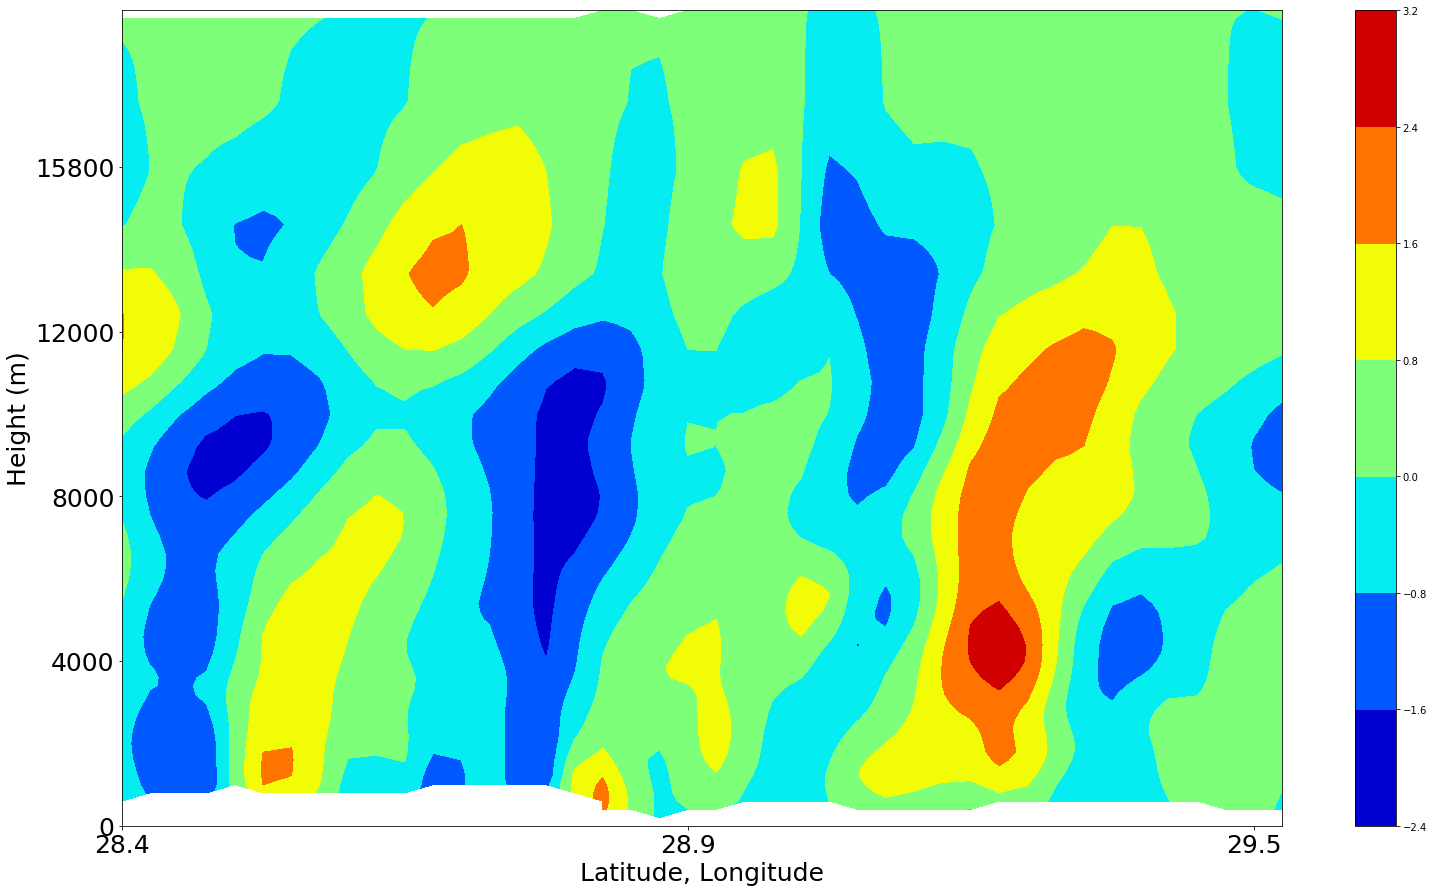

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.cm import get_cmap
import cartopy.crs as crs
from cartopy.feature import NaturalEarthFeature
from netCDF4 import Dataset

from wrf import to_np, getvar, CoordPair, vertcross

# Open the NetCDF file

path = "/home/liyuan3970/Data/demo4_run2/"

filename = path+ "wrfout_d02_2019-08-09_060000.nc"
ncfile = Dataset(filename)

# Extract the model height and wind speed
z = getvar(ncfile, "z")
#wspd =  getvar(ncfile, "uvmet_wspd_wdir",timeidx=60, units="kt")[0,:]
wspd =  getvar(ncfile, "wa",timeidx=87, units="m s-1")
# Create the start point and end point for the cross section
start_point = CoordPair(lat= 28.4, lon=120.9)
end_point = CoordPair(lat=29.5, lon=120.9)

# Compute the vertical cross-section interpolation.  Also, include the
# lat/lon points along the cross-section.
wspd_cross = vertcross(wspd, z, wrfin=ncfile, start_point=start_point,
                       end_point=end_point, latlon=True, meta=True)

# Create the figure
fig = plt.figure(figsize=(26,15))
ax = plt.axes()

# Make the contour plot
wspd_contours = ax.contourf(to_np(wspd_cross), cmap=get_cmap("jet"))

# Add the color bar
plt.colorbar(wspd_contours, ax=ax)

# Set the x-ticks to use latitude and longitude labels.
coord_pairs = to_np(wspd_cross.coords["xy_loc"])
x_ticks = np.arange(coord_pairs.shape[0])
x_labels = [pair.latlon_str(fmt="{:.2f}, {:.2f}")
            for pair in to_np(coord_pairs)]
x_table = [28.4,28.9,29.5]
ax.set_xticks(x_ticks[::20])
#ax.set_xticklabels(x_labels[::20], rotation=0, fontsize=25)
ax.set_xticklabels(x_table, rotation=0, fontsize=25)

# Set the y-ticks to be height.
vert_vals = to_np(wspd_cross.coords["vertical"])
v_ticks = np.arange(vert_vals.shape[0])

print(v_ticks[::20],vert_vals[:])
y_table = [0,4000,8000,12000,15800]
ax.set_yticks(v_ticks[::20])
ax.set_yticklabels(y_table, fontsize=25)
#ax.set_yticklabels(vert_vals[::20], fontsize=25)

# Set the x-axis and  y-axis labels
ax.set_xlabel("Latitude, Longitude", fontsize=25)
ax.set_ylabel("Height (m)", fontsize=25)
#plt.ylim(0,12000)
# plt.title("Vertical Cross Section of Wind Speed (kt)")
# plt.savefig('../图片包/括苍山图/'+'括苍山速度图')
plt.show()

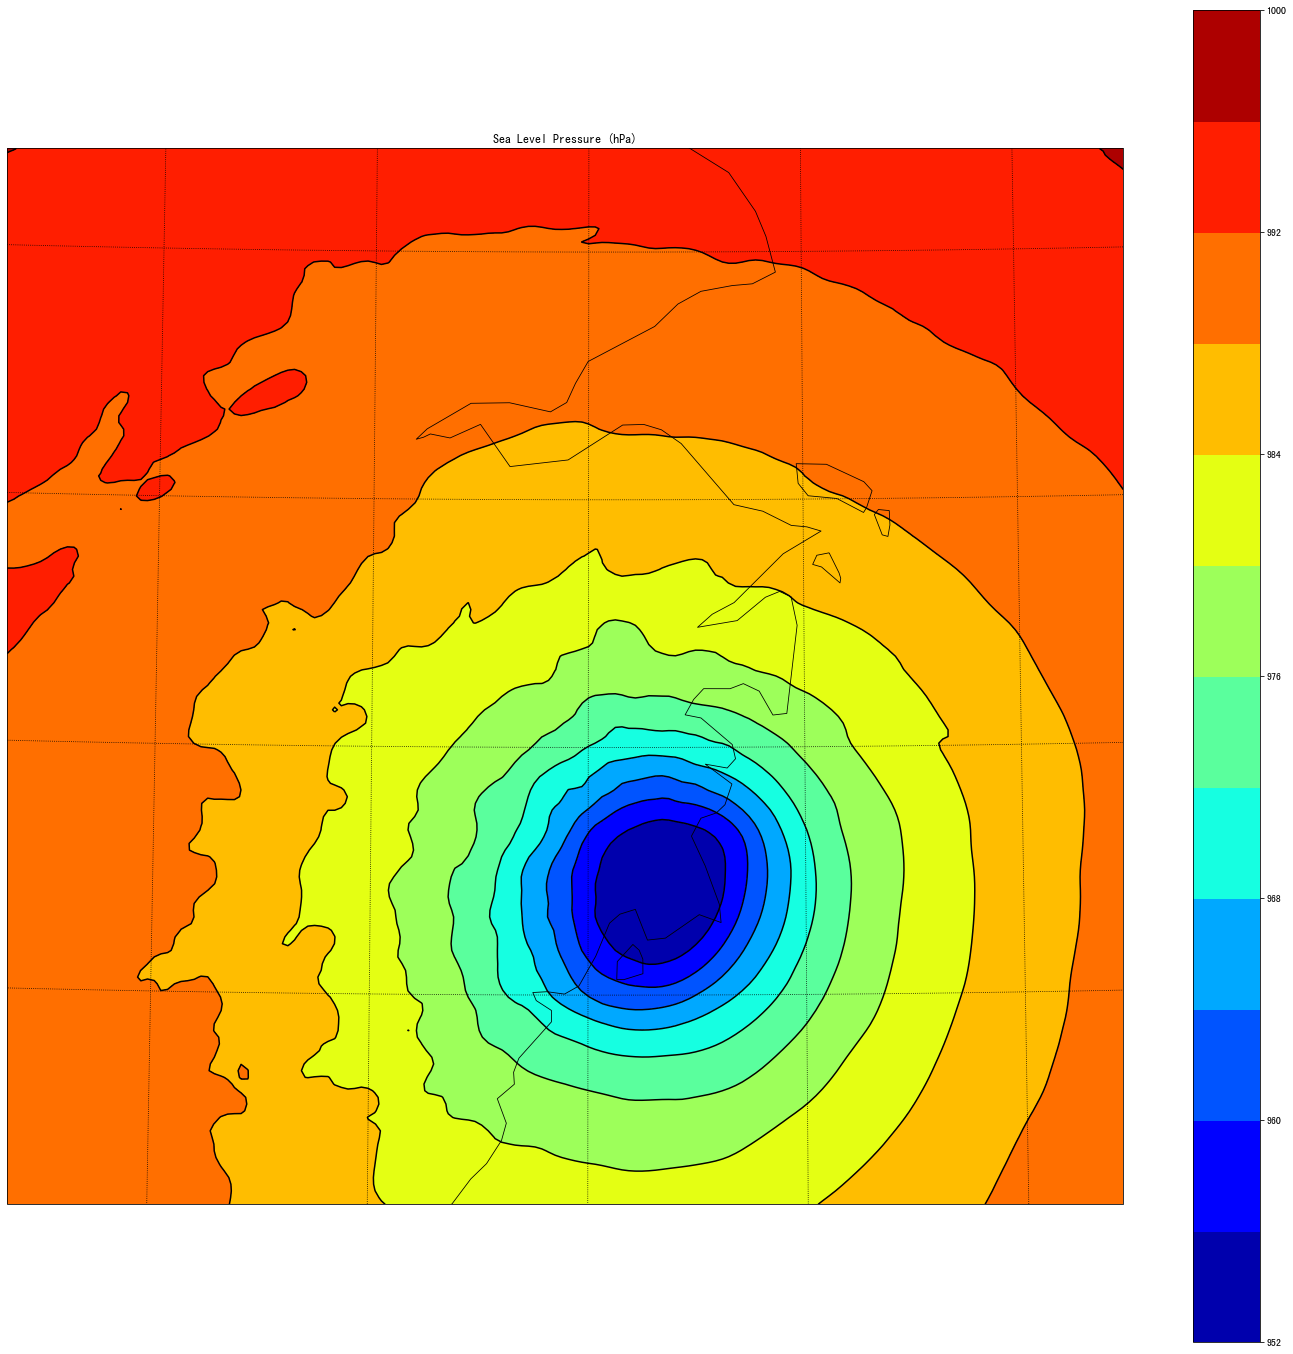

In [13]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import cartopy.crs as crs
from cartopy.feature import NaturalEarthFeature

from wrf import (to_np, getvar, smooth2d, get_cartopy, cartopy_xlim,
                 cartopy_ylim, latlon_coords)

# Open the NetCDF file
filepath = "/home/liyuan3970/Data/demo4_run2/"


ncfile = Dataset(filepath+"wrfout_d02_2019-08-09_06:00:00.nc")

# Get the sea level pressure
slp = getvar(ncfile, "slp", timeidx=95)
# slp = getvar(ncfile, "dbz", timeidx=95) #dbz
# Smooth the sea level pressure since it tends to be noisy near the
# mountains
smooth_slp = smooth2d(slp, 3, cenweight=4)

# Get the latitude and longitude points
lats, lons = latlon_coords(slp)

# Get the cartopy mapping object
cart_proj = get_cartopy(slp)

# Create a figure
fig = plt.figure(figsize=(25,25))
# Set the GeoAxes to the projection used by WRF
ax = plt.axes(projection=cart_proj)

# Download and add the states and coastlines
states = NaturalEarthFeature(category="cultural", scale="50m",
                             facecolor="none",
                             name="admin_1_states_provinces_shp")
ax.add_feature(states, linewidth=.5, edgecolor="black")
ax.coastlines('50m', linewidth=0.8)

# Make the contour outlines and filled contours for the smoothed sea level
# pressure.
plt.contour(to_np(lons), to_np(lats), to_np(smooth_slp), 10, colors="black",
            transform=crs.PlateCarree())
plt.contourf(to_np(lons), to_np(lats), to_np(smooth_slp), 10,
             transform=crs.PlateCarree(),
             cmap=get_cmap("jet"))

# Add a color bar
plt.colorbar(ax=ax, shrink=.98)

# Set the map bounds
ax.set_xlim(cartopy_xlim(smooth_slp))
ax.set_ylim(cartopy_ylim(smooth_slp))

# Add the gridlines
ax.gridlines(color="black", linestyle="dotted")

plt.title("Sea Level Pressure (hPa)")

plt.show()

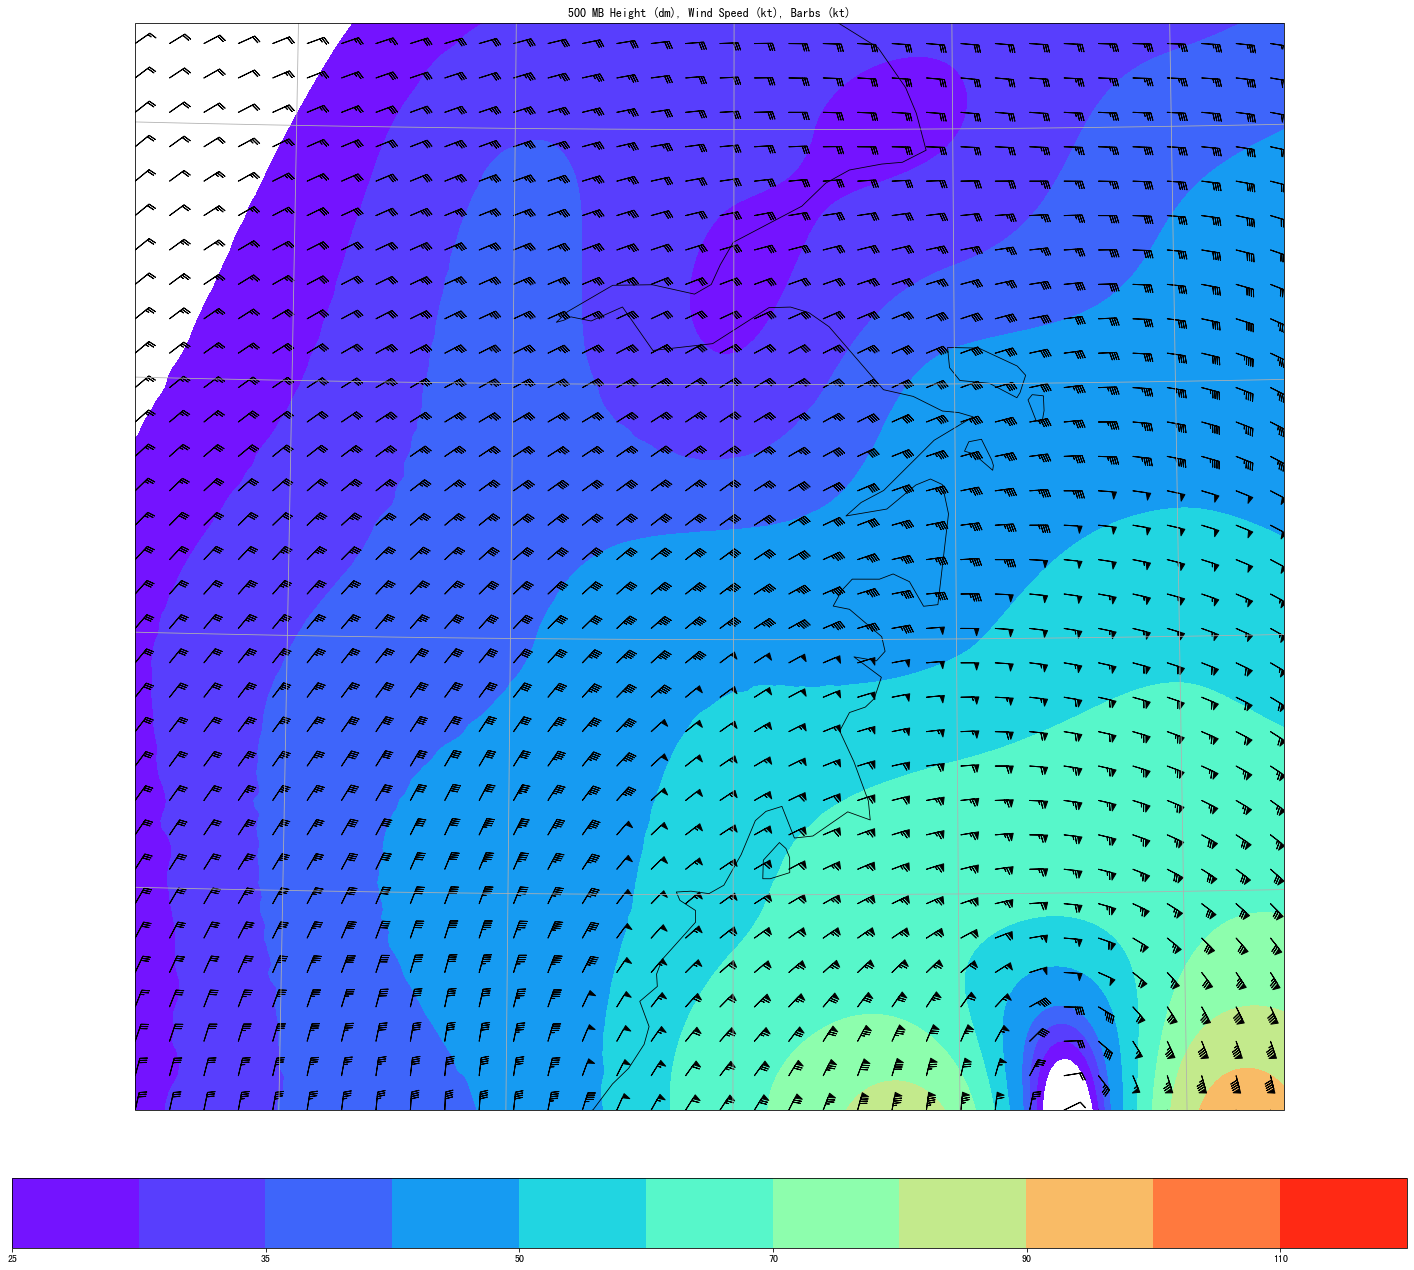

In [5]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import cartopy.crs as crs
from cartopy.feature import NaturalEarthFeature

from wrf import (getvar, interplevel, to_np, latlon_coords, get_cartopy,
                 cartopy_xlim, cartopy_ylim)


# Open the NetCDF file
filepath = "/home/liyuan3970/Data/demo4_run2/"


ncfile = Dataset(filepath+"wrfout_d02_2019-08-09_06:00:00.nc")


# Extract the pressure, geopotential height, and wind variables
p = getvar(ncfile, "pressure")
z = getvar(ncfile, "z", units="dm")
ua = getvar(ncfile, "ua", units="kt")
va = getvar(ncfile, "va", units="kt")
wspd = getvar(ncfile, "wspd_wdir", units="kts")[0,:]

# Interpolate geopotential height, u, and v winds to 500 hPa
ht_500 = interplevel(z, p, 500)
u_500 = interplevel(ua, p, 500)
v_500 = interplevel(va, p, 500)
wspd_500 = interplevel(wspd, p, 500)

# Get the lat/lon coordinates
lats, lons = latlon_coords(ht_500)

# Get the map projection information
cart_proj = get_cartopy(ht_500)

# Create the figure
fig = plt.figure(figsize=(25,25))
ax = plt.axes(projection=cart_proj)

# Download and add the states and coastlines
states = NaturalEarthFeature(category="cultural", scale="50m",
                             facecolor="none",
                             name="admin_1_states_provinces_shp")
ax.add_feature(states, linewidth=0.5, edgecolor="black")
ax.coastlines('50m', linewidth=0.8)

# Add the 500 hPa geopotential height contours
levels = np.arange(520., 580., 6.)
contours = plt.contour(to_np(lons), to_np(lats), to_np(ht_500),
                       levels=levels, colors="black",
                       transform=crs.PlateCarree())
plt.clabel(contours, inline=1, fontsize=10, fmt="%i")

# Add the wind speed contours
levels = [25, 30, 35, 40, 50, 60, 70, 80, 90, 100, 110, 120]
wspd_contours = plt.contourf(to_np(lons), to_np(lats), to_np(wspd_500),
                             levels=levels,
                             cmap=get_cmap("rainbow"),
                             transform=crs.PlateCarree())
plt.colorbar(wspd_contours, ax=ax, orientation="horizontal", pad=.05)

# Add the 500 hPa wind barbs, only plotting every 125th data point.
plt.barbs(to_np(lons[::5,::5]), to_np(lats[::5,::5]),
          to_np(u_500[::5, ::5]), to_np(v_500[::5, ::5]),
          transform=crs.PlateCarree(), length=6)

# Set the map bounds
ax.set_xlim(cartopy_xlim(ht_500))
ax.set_ylim(cartopy_ylim(ht_500))

ax.gridlines()

plt.title("500 MB Height (dm), Wind Speed (kt), Barbs (kt)")

plt.show()

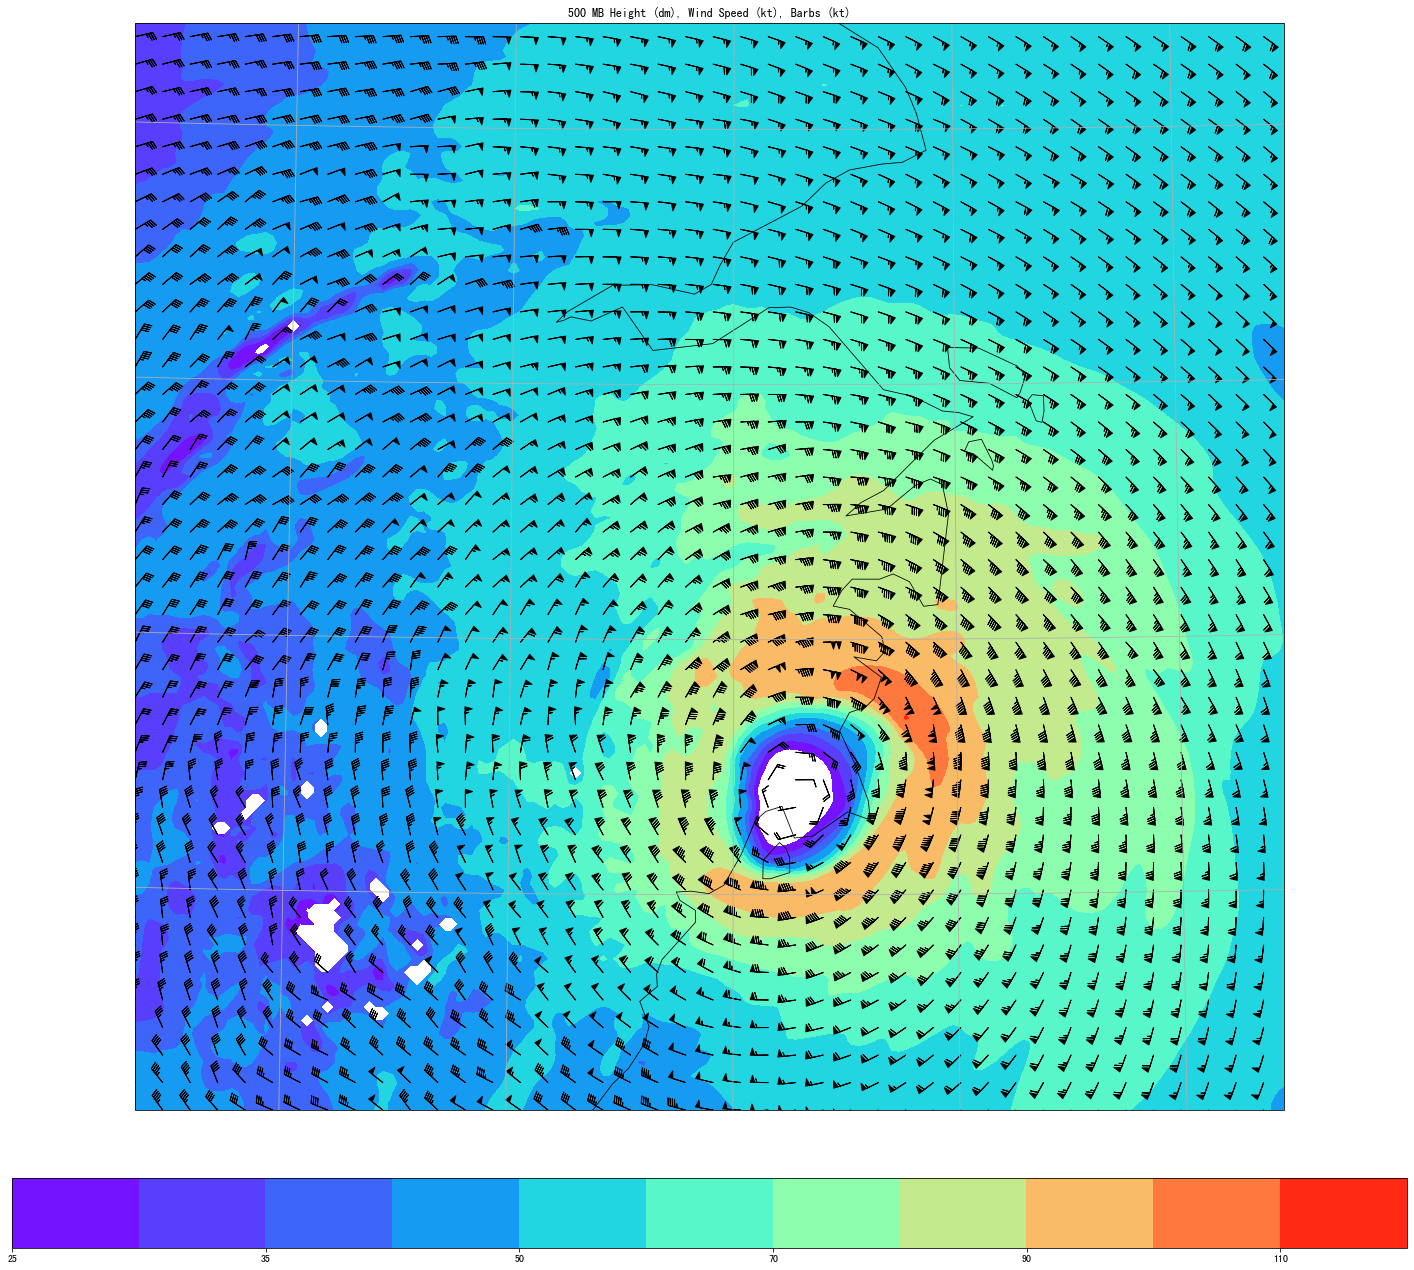

In [10]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import cartopy.crs as crs
from cartopy.feature import NaturalEarthFeature

from wrf import (getvar, interplevel, to_np, latlon_coords, get_cartopy,
                 cartopy_xlim, cartopy_ylim)


# Open the NetCDF file
filepath = "/home/liyuan3970/Data/demo4_run2/"


ncfile = Dataset(filepath+"wrfout_d02_2019-08-09_06:00:00.nc")


# Extract the pressure, geopotential height, and wind variables
p = getvar(ncfile, "pressure", timeidx=95)
z = getvar(ncfile, "z", units="dm", timeidx=95)
ua = getvar(ncfile, "ua", units="kt", timeidx=95)
va = getvar(ncfile, "va", units="kt", timeidx=95)
wspd = getvar(ncfile, "wspd_wdir", units="kts", timeidx=95)[0,:]

# Interpolate geopotential height, u, and v winds to 500 hPa
ht_500 = interplevel(z, p, 850)
u_500 = interplevel(ua, p, 850)
v_500 = interplevel(va, p, 850)
wspd_500 = interplevel(wspd, p, 850)

# Get the lat/lon coordinates
lats, lons = latlon_coords(ht_500)

# Get the map projection information
cart_proj = get_cartopy(ht_500)

# Create the figure
fig = plt.figure(figsize=(25,25))
ax = plt.axes(projection=cart_proj)

# Download and add the states and coastlines
states = NaturalEarthFeature(category="cultural", scale="50m",
                             facecolor="none",
                             name="admin_1_states_provinces_shp")
ax.add_feature(states, linewidth=0.5, edgecolor="black")
ax.coastlines('50m', linewidth=0.8)

# Add the 500 hPa geopotential height contours
levels = np.arange(520., 580., 6.)
contours = plt.contour(to_np(lons), to_np(lats), to_np(ht_500),
                       levels=levels, colors="black",
                       transform=crs.PlateCarree())
plt.clabel(contours, inline=1, fontsize=10, fmt="%i")

# Add the wind speed contours
levels = [25, 30, 35, 40, 50, 60, 70, 80, 90, 100, 110, 120]
wspd_contours = plt.contourf(to_np(lons), to_np(lats), to_np(wspd_500),
                             levels=levels,
                             cmap=get_cmap("rainbow"),
                             transform=crs.PlateCarree())
plt.colorbar(wspd_contours, ax=ax, orientation="horizontal", pad=.05)

# Add the 500 hPa wind barbs, only plotting every 125th data point.
plt.barbs(to_np(lons[::4,::4]), to_np(lats[::4,::4]),
          to_np(u_500[::4, ::4]), to_np(v_500[::4, ::4]),
          transform=crs.PlateCarree(), length=6)

# Set the map bounds
ax.set_xlim(cartopy_xlim(ht_500))
ax.set_ylim(cartopy_ylim(ht_500))

ax.gridlines()

plt.title("500 MB Height (dm), Wind Speed (kt), Barbs (kt)")

plt.show()

# 计算雷达剖面图

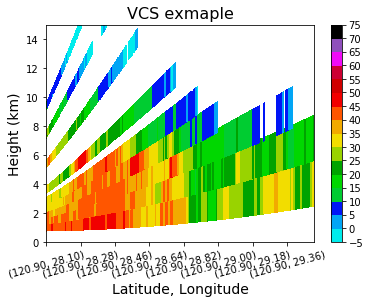

In [9]:
%matplotlib inline
from pycwr.io import *
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from pycwr.draw.RadarPlot import Graph, GraphMap
file = r"/home/liyuan3970/Data/data/meto_data/radar_typhoon_liqima/wenzhou_rada/09/Z_RADR_I_Z9577_20190809162900_O_DOR_SA_CAP.bin.bz2"
data = read_auto(file)
#NRadar = data.ToPRD()
#PyartRadar = data.ToPyartRadar()

fig, ax = plt.subplots()
graph = GraphMap(data, ccrs.PlateCarree())
graph.plot_vcs_map(ax, (120.9, 28.1), (120.9, 29.5), "dBZ", cmap="pyart_NWSRef")
ax.set_ylim([0,15])
ax.set_ylabel("Height (km)", fontsize=14)
ax.set_xlabel("Latitude, Longitude", fontsize=14)
ax.set_title("VCS exmaple", fontsize=16)
plt.show()

In [4]:
import pymssql 
import pandas as pd

## sqlserver
server = "172.21.158.201"    # 连接服务器地址
user = "down"# 连接帐号
password = "downx"# 连接密码
conn = pymssql.connect(server, user, password, "ZJSZDZDB")  #获取连接


## data
sql_location ="select dFy,fFy from TAB_Aws2019 where \
(IIiii='58653'and tTime between '2019-08-09 23:01'\
 and '2019-08-10 06:01')"

# sql_location ="select b.lat,b.lon,a.IIiii,a.fFy,a.dFy from TAB_Mws2019 as a left join \
# TAB_StationInfo as b on a.IIiii = b.IIiii where(tTime == '2019-08-09 23:00' and '2019-08-10 06:00' and b.Province= '浙江')"


df_location = pd.read_sql(sql_location , con=conn)

df_location.to_csv("../data/括苍山.csv")